# COGS 108 - Final Project 

# Overview

Upon the outbreak of COVID-19 in Wuhan, an unprecedented city-wide quarantine was implemented at this "ground zero". Would restricting the incoming traffic from Hubei province really help to limit the spread of COVID-19? Our project aims to find the answer to the question above.

# Names

1. Zanyuan Yang
2. Zihao Chen
3. Alex Guo
4. Yiyang Yin
5. Sijie Wang

# Research Question

The Chinese government issued multiple quarantines on major cities in Hubei province, China, The epicenter of the COVID-19 disease to prevent coronavirus from further spreading. Did this decision really help to contain the disease?

## Background and Prior Work

After 3.5 months since its outbreak in Wuhan city of China, the highly-contagious COVID-19 was just officially announced as a pandemic by the World Health Organization. With 191, 127 confirmed cases and 7, 807 deaths distributed across 145 countries globally (by March 18, 2020 [1]), an effective method to halt the spread of COVID-19 is urgently desired.

Wuhan, the first city where the first confirmed case of this disease was reported, got sealed off entirely on January 23, 2020: Airplanes, trains, buses, and subways were all closed by 10 am that day and 35 million people were quarantined[2]. Would this "historic quarantine" really be the effective method to curb COVID-19 that we are all desiring? 

Many statistic models on the spread of COVID-19 have been created within the past few months, but rarely did they take into account the transportation factor and the quarantine that has been declared. For this project, we are going to collect data to describe how the coronavirus has been spreading, and compare the data to the statistic models, in the hope to produce an analysis on whether the quarantine has been useful or not.

Between the announcement of this quarantine and the actual implementations on all means of leaving the city, 5 million people left Wuhan [3]. If the quarantine helped curb COVID-19, the regions who had more incoming travelers fleeing from Wuhan should see a positive change in the pattern of their numbers of COVID-19 confirmed cases 9 days after Jan 23, 2020. (9 days being the median of the lengths of COVID-19 incubation period [4])

References (include links):
- [1] "Coronavirus Disease (COVID-2019) Situation Report 58", World Health Organization, March 18 2020 https://www.who.int/docs/default-source/coronaviruse/situation-reports/20200318-sitrep-58-covid-19.pdf
- [2] "A Historic Quarantine", The Atlantic, January 24 2020 https://www.theatlantic.com/health/archive/2020/01/china-quarantine-coronavirus/605455/
- [3] "5 million left Wuhan before lockdown, 1,000 new coronavirus cases expected in city", South China Morning Post, January 26 2020 https://www.scmp.com/news/china/society/article/3047720/chinese-premier-li-keqiang-head-coronavirus-crisis-team-outbreak
- [4] "Estimation of incubation period distribution of COVID-19 using disease onset forward time: a novel cross-sectional and forward follow-up study", medRxiv, March 10 2020, doi: https://doi.org/10.1101/2020.03.06.20032417

# Hypothesis


Since it has been confirmed that the coronavirus spread among people who are in close contact, We expect to see a positive correlation between the population flow from Hubei province (the province whose most population-dense city being Wuhan) to other provinces and the COVID-19 confirmed cases in those destination provinces. 

# Dataset(s)

## Dataset 1 - 2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE
Link to dataset: https://github.com/CSSEGISandData/2019-nCoV
1. 476 observations: each observation for one geographical state/province
    - This dataset contains the most up-to-date number of confirmed, deaths, recovery cases and the time at which these numbers were last updated for each region
    - Sources: 
        - World Health Organization (WHO): https://www.who.int/DXY.cn. Pneumonia. 2020. http://3g.dxy.cn/newh5/view/pneumonia.
        - BNO News: https://bnonews.com/index.php/2020/02/the-latest-coronavirus-cases/
        - National Health Commission of the People’s Republic of China (NHC): http://www.nhc.gov.cn/xcs/yqtb/list_gzbd.shtml
        - China CDC (CCDC): http://weekly.chinacdc.cn/news/TrackingtheEpidemic.htm
        - Hong Kong Department of Health: https://www.chp.gov.hk/en/features/102465.html
        - Macau Government: https://www.ssm.gov.mo/portal/
        - Taiwan CDC: https://sites.google.com/cdc.gov.tw/2019ncov/taiwan?authuser=0
        - US CDC: https://www.cdc.gov/coronavirus/2019-ncov/index.html
        - Government of Canada: https://www.canada.ca/en/public-health/services/diseases/coronavirus.html
        - Australia Government Department of Health: https://www.health.gov.au/news/coronavirus-update-at-a-glance
        - European Centre for Disease Prevention and Control (ECDC): https://www.ecdc.europa.eu/en/geographical-distribution-2019-ncov-cases
        - Ministry of Health Singapore (MOH): https://www.moh.gov.sg/covid-19
        - Italy Ministry of Health: http://www.salute.gov.it/nuovocoronavirus
    - Provided by JHU CSSE
2. For our research question, we chose to use:
    - State/Province
    - Number of confirmed cases for this region at each timestamp from 
3. Problems with this dataset:
    - The number of confirmed cases may not be an accurate representation of number of people who actually have COVID-19
  
## Dataset 2 - Baidu Qianxi
Link to dataset: we created a script (see ./baidu qianxi/qianxi.ipynb) to fetch the data through HTTP requests to the Baidu Qianxi API
1. 37 * 30 = 1110 observations: each observation for the percentage of population flow from Hubei to a state/province on one day between January 15, 2020, and February 20, 2020
    - This dataset contains the percentage of population flow from Hubei to other destination states/provinces on each day before and after the January 23, 2020 quarantine
    - Sources: 
        - Baidu Map
2. For our research question, we chose to use:
    - State/Province
    - Percentage of incoming population flow from Hubei to this state/province on one timestamp (day)
        - example: if the value of one state/province is 20 on March 18, 2020, then 20% of the total population coming out of Hubei went into that state/province between March 18, 00:00 AM 2020 and March 18, 11:59 PM 2020.
3. Problems with this dataset:
    - We don't have the exact number of people traveling from Hubei to a destination, for homeland security concerns by the Chinese govornment, the exact numbers are not published.
    
## Combining Datasets
We want to infer a relationship between population flow from Hubei and number of confirmed COVID-19 cases in the destination.

# Setup

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

# Data Cleaning

## Confirmed cases data
This is the data we found on Github, which is the total number of confirmed new coronavirus cases in Wuhan from January 21 to February 14 in each city. Each row represents the cumulative number of cases in its city.

Link to dataset: https://github.com/CSSEGISandData/COVID-19


In [2]:
df_confirm = pd.read_csv('time_series-ncov-Confirmed.csv')
df_confirm

,Province/State,Country/Region,Lat,Long,1/21/20,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20
0,Anhui,Mainland China,31.82571,117.2264,NaN,1.0,9.0,15.0,60.0,70.0,...,889.0,910.0,934,934,950,962,973,982,986,987
1,Beijing,Mainland China,40.18238,116.4142,10.0,14.0,22.0,36.0,51.0,68.0,...,342.0,366.0,366,372,375,380,381,387,393,395
2,Chongqing,Mainland China,30.05718,107.8740,5.0,6.0,9.0,27.0,75.0,110.0,...,505.0,518.0,529,532,544,551,553,555,560,567
3,Fujian,Mainland China,26.07783,117.9895,NaN,1.0,5.0,10.0,18.0,35.0,...,272.0,279.0,281,281,285,287,290,292,293,293
4,Gansu,Mainland China,36.06110,103.8343,NaN,NaN,2.0,2.0,7.0,14.0,...,86.0,87.0,90,90,90,90,91,91,91,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,NaN,Belgium,50.50390,4.4699,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1,1,1,1,1,1,1,1
70,"Madison, WI",US,43.07310,-89.4012,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1,1,1,1,1,1,1,1
71,Diamond Princess cruise ship,Others,35.44370,129.6380,NaN,NaN,NaN,NaN,NaN,NaN,...,135.0,175.0,218,218,285,355,454,542,621,634
72,"San Diego County, CA",US,32.71570,-117.1611,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,2,2,2,2,2,2,2,2


##### drop the column "Lat" and "Long"
We dropped the useless data of longitude and latitude of the city to better analyze the relationship between the data and form the current data structure.

In [3]:
df_confirm = df_confirm.drop(columns=['Lat', 'Long'])
df_confirm

,Province/State,Country/Region,1/21/20,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20
0,Anhui,Mainland China,NaN,1.0,9.0,15.0,60.0,70.0,106.0,152.0,...,889.0,910.0,934,934,950,962,973,982,986,987
1,Beijing,Mainland China,10.0,14.0,22.0,36.0,51.0,68.0,80.0,91.0,...,342.0,366.0,366,372,375,380,381,387,393,395
2,Chongqing,Mainland China,5.0,6.0,9.0,27.0,75.0,110.0,132.0,147.0,...,505.0,518.0,529,532,544,551,553,555,560,567
3,Fujian,Mainland China,NaN,1.0,5.0,10.0,18.0,35.0,59.0,82.0,...,272.0,279.0,281,281,285,287,290,292,293,293
4,Gansu,Mainland China,NaN,NaN,2.0,2.0,7.0,14.0,19.0,24.0,...,86.0,87.0,90,90,90,90,91,91,91,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,NaN,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1,1,1,1,1,1,1,1
70,"Madison, WI",US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1,1,1,1,1,1,1,1
71,Diamond Princess cruise ship,Others,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,135.0,175.0,218,218,285,355,454,542,621,634
72,"San Diego County, CA",US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,2,2,2,2,2,2,2,2


#### In the third figure, we changed the values of all NAN to 0, then calculated the cumulative number of confirmed cases in each city as the last column, and sorted out the data structure in the order of cumulative confirmed cases from the highest to the lowest.

##### `Replace` all value `NaN` to `0.0`

In [4]:
df_confirm = df_confirm.dropna()
df_confirm = df_confirm.reset_index(drop=True)
df_confirm

,Province/State,Country/Region,1/21/20,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20
0,Beijing,Mainland China,10.0,14.0,22.0,36.0,51.0,68.0,80.0,91.0,...,342.0,366.0,366,372,375,380,381,387,393,395
1,Chongqing,Mainland China,5.0,6.0,9.0,27.0,75.0,110.0,132.0,147.0,...,505.0,518.0,529,532,544,551,553,555,560,567
2,Guangdong,Mainland China,17.0,26.0,32.0,53.0,98.0,146.0,151.0,241.0,...,1219.0,1241.0,1261,1261,1294,1316,1322,1328,1331,1332
3,Hubei,Mainland China,270.0,444.0,444.0,549.0,1052.0,1423.0,2714.0,3554.0,...,33366.0,48206.0,51986,51986,56249,58182,59989,61682,62031,62442
4,Hunan,Mainland China,1.0,4.0,9.0,24.0,69.0,100.0,100.0,221.0,...,946.0,968.0,988,988,1001,1004,1006,1007,1008,1010
5,Jiangxi,Mainland China,2.0,2.0,7.0,18.0,36.0,48.0,72.0,109.0,...,844.0,872.0,900,900,913,925,930,933,934,934
6,Shandong,Mainland China,1.0,2.0,6.0,15.0,39.0,63.0,87.0,121.0,...,497.0,506.0,519,523,532,537,541,543,544,546
7,Shanghai,Mainland China,9.0,9.0,16.0,20.0,40.0,53.0,66.0,80.0,...,306.0,313.0,318,318,326,328,333,333,333,334
8,Sichuan,Mainland China,2.0,5.0,8.0,15.0,44.0,69.0,90.0,108.0,...,436.0,451.0,463,463,470,481,495,508,514,520
9,Tianjin,Mainland China,2.0,4.0,4.0,8.0,13.0,14.0,23.0,25.0,...,106.0,113.0,119,120,122,124,125,128,130,131


##### drop the row "`Seattle, WA` " (China Province only)

In [5]:
df_confirm.drop(df_confirm.index[[13,13]])

,Province/State,Country/Region,1/21/20,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20
0,Beijing,Mainland China,10.0,14.0,22.0,36.0,51.0,68.0,80.0,91.0,...,342.0,366.0,366,372,375,380,381,387,393,395
1,Chongqing,Mainland China,5.0,6.0,9.0,27.0,75.0,110.0,132.0,147.0,...,505.0,518.0,529,532,544,551,553,555,560,567
2,Guangdong,Mainland China,17.0,26.0,32.0,53.0,98.0,146.0,151.0,241.0,...,1219.0,1241.0,1261,1261,1294,1316,1322,1328,1331,1332
3,Hubei,Mainland China,270.0,444.0,444.0,549.0,1052.0,1423.0,2714.0,3554.0,...,33366.0,48206.0,51986,51986,56249,58182,59989,61682,62031,62442
4,Hunan,Mainland China,1.0,4.0,9.0,24.0,69.0,100.0,100.0,221.0,...,946.0,968.0,988,988,1001,1004,1006,1007,1008,1010
5,Jiangxi,Mainland China,2.0,2.0,7.0,18.0,36.0,48.0,72.0,109.0,...,844.0,872.0,900,900,913,925,930,933,934,934
6,Shandong,Mainland China,1.0,2.0,6.0,15.0,39.0,63.0,87.0,121.0,...,497.0,506.0,519,523,532,537,541,543,544,546
7,Shanghai,Mainland China,9.0,9.0,16.0,20.0,40.0,53.0,66.0,80.0,...,306.0,313.0,318,318,326,328,333,333,333,334
8,Sichuan,Mainland China,2.0,5.0,8.0,15.0,44.0,69.0,90.0,108.0,...,436.0,451.0,463,463,470,481,495,508,514,520
9,Tianjin,Mainland China,2.0,4.0,4.0,8.0,13.0,14.0,23.0,25.0,...,106.0,113.0,119,120,122,124,125,128,130,131


##### Add the column `total` to calculate the tatal confirmed case in each country

In [6]:
df_confirm = df_confirm.assign(total = df_confirm['2/20/20'])

##### Use `sort_values` to arrange the row with highest `total` which display in the top
##### Also reset the index so that the highest `total` is index 0

In [7]:
df_confirm = df_confirm.sort_values(by=['total'], ascending=False)
df_confirm = df_confirm.reset_index(drop=True)
df_confirm

,Province/State,Country/Region,1/21/20,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,total
0,Hubei,Mainland China,270.0,444.0,444.0,549.0,1052.0,1423.0,2714.0,3554.0,...,48206.0,51986,51986,56249,58182,59989,61682,62031,62442,62442
1,Guangdong,Mainland China,17.0,26.0,32.0,53.0,98.0,146.0,151.0,241.0,...,1241.0,1261,1261,1294,1316,1322,1328,1331,1332,1332
2,Zhejiang,Mainland China,5.0,10.0,27.0,43.0,104.0,128.0,173.0,296.0,...,1145.0,1155,1155,1162,1167,1171,1172,1174,1175,1175
3,Hunan,Mainland China,1.0,4.0,9.0,24.0,69.0,100.0,100.0,221.0,...,968.0,988,988,1001,1004,1006,1007,1008,1010,1010
4,Jiangxi,Mainland China,2.0,2.0,7.0,18.0,36.0,48.0,72.0,109.0,...,872.0,900,900,913,925,930,933,934,934,934
5,Chongqing,Mainland China,5.0,6.0,9.0,27.0,75.0,110.0,132.0,147.0,...,518.0,529,532,544,551,553,555,560,567,567
6,Shandong,Mainland China,1.0,2.0,6.0,15.0,39.0,63.0,87.0,121.0,...,506.0,519,523,532,537,541,543,544,546,546
7,Sichuan,Mainland China,2.0,5.0,8.0,15.0,44.0,69.0,90.0,108.0,...,451.0,463,463,470,481,495,508,514,520,520
8,Beijing,Mainland China,10.0,14.0,22.0,36.0,51.0,68.0,80.0,91.0,...,366.0,366,372,375,380,381,387,393,395,395
9,Shanghai,Mainland China,9.0,9.0,16.0,20.0,40.0,53.0,66.0,80.0,...,313.0,318,318,326,328,333,333,333,334,334


### For the fourth and fifth graphs, we transformed each row of data from cumulative confirmed cases to daily new cases. We divided the data into the first 14 days and the second 14 days after the lockdown of major cities in Hubei province.

In [8]:
df_confirm_first_14days = df_confirm.assign(after_14days_lockdown = df_confirm['2/6/20'] - df_confirm['1/23/20'])
df_confirm_second_14days = df_confirm.assign(another_14days_lockdown = df_confirm['2/20/20'] - df_confirm['2/7/20'])


In [9]:
df_confirm_second_14days['2/20/20'] = df_confirm_second_14days['2/20/20'] - df_confirm_second_14days['2/19/20']
df_confirm_second_14days['2/19/20'] = df_confirm_second_14days['2/19/20'] - df_confirm_second_14days['2/18/20']
df_confirm_second_14days['2/18/20'] = df_confirm_second_14days['2/18/20'] - df_confirm_second_14days['2/17/20']
df_confirm_second_14days['2/17/20'] = df_confirm_second_14days['2/17/20'] - df_confirm_second_14days['2/16/20']
df_confirm_second_14days['2/16/20'] = df_confirm_second_14days['2/16/20'] - df_confirm_second_14days['2/15/20']
df_confirm_second_14days['2/15/20'] = df_confirm_second_14days['2/15/20'] - df_confirm_second_14days['2/14/20']
df_confirm_second_14days['2/14/20'] = df_confirm_second_14days['2/14/20'] - df_confirm_second_14days['2/13/20']
df_confirm_second_14days['2/13/20'] = df_confirm_second_14days['2/13/20'] - df_confirm_second_14days['2/12/20']
df_confirm_second_14days['2/12/20'] = df_confirm_second_14days['2/12/20'] - df_confirm_second_14days['2/11/20']
df_confirm_second_14days['2/11/20'] = df_confirm_second_14days['2/11/20'] - df_confirm_second_14days['2/10/20']
df_confirm_second_14days['2/10/20'] = df_confirm_second_14days['2/10/20'] - df_confirm_second_14days['2/9/20']
df_confirm_second_14days['2/9/20'] = df_confirm_second_14days['2/9/20'] - df_confirm_second_14days['2/8/20']
df_confirm_second_14days['2/8/20'] = df_confirm_second_14days['2/8/20'] - df_confirm_second_14days['2/7/20']
df_confirm_second_14days['2/7/20'] = df_confirm_second_14days['2/7/20'] - df_confirm_second_14days['2/6/20']

df_confirm_first_14days['2/6/20'] = df_confirm_first_14days['2/6/20'] - df_confirm_first_14days['2/5/20']
df_confirm_first_14days['2/5/20'] = df_confirm_first_14days['2/5/20'] - df_confirm_first_14days['2/4/20']
df_confirm_first_14days['2/4/20'] = df_confirm_first_14days['2/4/20'] - df_confirm_first_14days['2/3/20']
df_confirm_first_14days['2/3/20'] = df_confirm_first_14days['2/3/20'] - df_confirm_first_14days['2/2/20']
df_confirm_first_14days['2/2/20'] = df_confirm_first_14days['2/2/20'] - df_confirm_first_14days['2/1/20']
df_confirm_first_14days['2/1/20'] = df_confirm_first_14days['2/1/20'] - df_confirm_first_14days['1/31/20']
df_confirm_first_14days['1/31/20'] = df_confirm_first_14days['1/31/20'] - df_confirm_first_14days['1/30/20']
df_confirm_first_14days['1/30/20'] = df_confirm_first_14days['1/30/20'] - df_confirm_first_14days['1/29/20']
df_confirm_first_14days['1/29/20'] = df_confirm_first_14days['1/29/20'] - df_confirm_first_14days['1/28/20']
df_confirm_first_14days['1/28/20'] = df_confirm_first_14days['1/28/20'] - df_confirm_first_14days['1/27/20']
df_confirm_first_14days['1/27/20'] = df_confirm_first_14days['1/27/20'] - df_confirm_first_14days['1/26/20']
df_confirm_first_14days['1/26/20'] = df_confirm_first_14days['1/26/20'] - df_confirm_first_14days['1/25/20']
df_confirm_first_14days['1/25/20'] = df_confirm_first_14days['1/25/20'] - df_confirm_first_14days['1/24/20']
df_confirm_first_14days['1/24/20'] = df_confirm_first_14days['1/24/20'] - df_confirm_first_14days['1/23/20']
df_confirm_first_14days['1/23/20'] = df_confirm_first_14days['1/23/20'] - df_confirm_first_14days['1/22/20']


In [10]:
df_confirm_first_14days = df_confirm_first_14days.drop(columns=['2/20/20', '2/19/20', '2/18/20', '2/17/20'
                                                               , '2/16/20', '2/15/20', '2/14/20', '2/13/20'
                                                               , '2/12/20', '2/11/20', '2/10/20', '2/9/20'
                                                               , '2/8/20', '2/7/20'])
df_confirm_first_14days

,Province/State,Country/Region,1/21/20,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,total,after_14days_lockdown
0,Hubei,Mainland China,270.0,444.0,0.0,105.0,503.0,371.0,1291.0,840.0,...,317.0,903.0,1347.0,4024.0,2345.0,3156.0,2987.0,0.0,62442,19221.0
1,Guangdong,Mainland China,17.0,26.0,6.0,21.0,45.0,48.0,5.0,90.0,...,43.0,82.0,99.0,148.0,42.0,145.0,74.0,26.0,1332,938.0
2,Zhejiang,Mainland China,5.0,10.0,17.0,16.0,61.0,24.0,45.0,123.0,...,0.0,110.0,61.0,125.0,0.0,171.0,59.0,0.0,1175,927.0
3,Hunan,Mainland China,1.0,4.0,5.0,15.0,45.0,31.0,0.0,121.0,...,0.0,55.0,57.0,132.0,0.0,140.0,50.0,0.0,1010,702.0
4,Jiangxi,Mainland China,2.0,2.0,5.0,11.0,18.0,12.0,24.0,37.0,...,0.0,78.0,46.0,105.0,0.0,157.0,52.0,0.0,934,593.0
5,Chongqing,Mainland China,5.0,6.0,3.0,18.0,48.0,35.0,22.0,15.0,...,17.0,29.0,36.0,53.0,37.0,29.0,23.0,11.0,567,391.0
6,Shandong,Mainland China,1.0,2.0,4.0,9.0,24.0,24.0,24.0,34.0,...,13.0,26.0,22.0,40.0,24.0,28.0,45.0,4.0,546,341.0
7,Sichuan,Mainland China,2.0,5.0,3.0,7.0,29.0,25.0,21.0,18.0,...,0.0,35.0,30.0,47.0,0.0,47.0,20.0,0.0,520,313.0
8,Beijing,Mainland China,10.0,14.0,8.0,14.0,15.0,17.0,12.0,11.0,...,3.0,25.0,29.0,23.0,21.0,16.0,46.0,0.0,395,252.0
9,Shanghai,Mainland China,9.0,9.0,7.0,4.0,20.0,13.0,13.0,14.0,...,11.0,23.0,34.0,24.0,15.0,25.0,21.0,3.0,334,241.0


In [11]:
# The maximum number of new coronavirus cases diagnosed daily in these provinces during the first 14 days. 
max_first_14days = df_confirm_first_14days.drop(['total','after_14days_lockdown'],axis = 1).max(axis=1)
print(max_first_14days)

# The standard deviation of these province during the first 14 days and we drop the data at 1/123/20 since
# coronavirus cases were not reported in most provinces at this day
sd_first_14days = df_confirm_first_14days.drop(['total','after_14days_lockdown', '1/23/20'],axis = 1).std(axis=1)
print(sd_first_14days)

0     4024.0
1      148.0
2      171.0
3      140.0
4      157.0
5       53.0
6       45.0
7       47.0
8       46.0
9       34.0
10      18.0
11      12.0
12       5.0
13       1.0
dtype: float64
0     1226.802482
1       43.074693
2       56.547178
3       48.691161
4       44.462297
5       14.004166
6       12.858201
7       16.346253
8       10.730020
9        8.336416
10       5.055937
11       3.483293
12       1.340087
13       0.341565
dtype: float64


In [12]:
df_confirm_second_14days = df_confirm_second_14days.drop(columns=['1/21/20','1/22/20','1/23/20', '1/24/20', 
                                                                  '1/25/20', '1/26/20', '1/27/20', '1/28/20', 
                                                                  '1/29/20', '1/30/20', '1/31/20', '2/1/20', 
                                                                  '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20'])
df_confirm_second_14days

,Province/State,Country/Region,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,total,another_14days_lockdown
0,Hubei,Mainland China,5288.0,2147.0,2531.0,2097.0,1638.0,14840.0,3780.0,0,4263,1933,1807,1693,349,411,62442,37489.0
1,Guangdong,Mainland China,105.0,45.0,31.0,8.0,60.0,22.0,20.0,0,33,22,6,6,3,1,1332,257.0
2,Zhejiang,Mainland China,94.0,27.0,17.0,0.0,39.0,14.0,10.0,0,7,5,4,1,2,1,1175,127.0
3,Hunan,Mainland China,92.0,35.0,41.0,0.0,67.0,22.0,20.0,0,13,3,2,1,1,2,1010,207.0
4,Jiangxi,Mainland China,98.0,42.0,31.0,0.0,73.0,28.0,28.0,0,13,12,5,3,1,0,934,236.0
5,Chongqing,Mainland China,26.0,20.0,22.0,18.0,19.0,13.0,11.0,3,12,7,2,2,5,7,567,141.0
6,Shandong,Mainland China,60.0,28.0,24.0,7.0,31.0,9.0,13.0,4,9,5,4,2,1,2,546,139.0
7,Sichuan,Mainland China,42.0,23.0,19.0,0.0,31.0,15.0,12.0,0,7,11,14,13,6,6,520,157.0
8,Beijing,Mainland China,41.0,11.0,11.0,0.0,5.0,24.0,0.0,6,3,5,1,6,6,2,395,80.0
9,Shanghai,Mainland China,24.0,11.0,3.0,4.0,7.0,7.0,5.0,0,8,2,5,0,0,1,334,53.0


In [13]:
# The maximum number of new coronavirus cases diagnosed daily in these provinces during the second 14 days. 
max_second_14days = df_confirm_second_14days.drop(['total','another_14days_lockdown'],axis = 1).max(axis=1)
print(max_second_14days)

# The standard deviation of these province during the second 14 days and we drop the data at 2/14/20 since
# coronavirus cases were not reported in most provinces at this day
sd_second_14days = df_confirm_second_14days.drop(['total','another_14days_lockdown', '2/14/20'],axis = 1).std(axis=1)
print(sd_second_14days)

0     14840.0
1       105.0
2        94.0
3        92.0
4        98.0
5        26.0
6        60.0
7        42.0
8        41.0
9        24.0
10        8.0
11       11.0
12        2.0
13        0.0
dtype: float64
0     3743.277098
1       29.059841
2       25.836021
3       28.945351
4       30.266551
5        7.858525
6       16.896745
7       11.345958
8       11.610671
9        6.343784
10       2.529315
11       3.439961
12       0.767948
13       0.000000
dtype: float64


In [14]:
df_confirm_first_14days

,Province/State,Country/Region,1/21/20,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,total,after_14days_lockdown
0,Hubei,Mainland China,270.0,444.0,0.0,105.0,503.0,371.0,1291.0,840.0,...,317.0,903.0,1347.0,4024.0,2345.0,3156.0,2987.0,0.0,62442,19221.0
1,Guangdong,Mainland China,17.0,26.0,6.0,21.0,45.0,48.0,5.0,90.0,...,43.0,82.0,99.0,148.0,42.0,145.0,74.0,26.0,1332,938.0
2,Zhejiang,Mainland China,5.0,10.0,17.0,16.0,61.0,24.0,45.0,123.0,...,0.0,110.0,61.0,125.0,0.0,171.0,59.0,0.0,1175,927.0
3,Hunan,Mainland China,1.0,4.0,5.0,15.0,45.0,31.0,0.0,121.0,...,0.0,55.0,57.0,132.0,0.0,140.0,50.0,0.0,1010,702.0
4,Jiangxi,Mainland China,2.0,2.0,5.0,11.0,18.0,12.0,24.0,37.0,...,0.0,78.0,46.0,105.0,0.0,157.0,52.0,0.0,934,593.0
5,Chongqing,Mainland China,5.0,6.0,3.0,18.0,48.0,35.0,22.0,15.0,...,17.0,29.0,36.0,53.0,37.0,29.0,23.0,11.0,567,391.0
6,Shandong,Mainland China,1.0,2.0,4.0,9.0,24.0,24.0,24.0,34.0,...,13.0,26.0,22.0,40.0,24.0,28.0,45.0,4.0,546,341.0
7,Sichuan,Mainland China,2.0,5.0,3.0,7.0,29.0,25.0,21.0,18.0,...,0.0,35.0,30.0,47.0,0.0,47.0,20.0,0.0,520,313.0
8,Beijing,Mainland China,10.0,14.0,8.0,14.0,15.0,17.0,12.0,11.0,...,3.0,25.0,29.0,23.0,21.0,16.0,46.0,0.0,395,252.0
9,Shanghai,Mainland China,9.0,9.0,7.0,4.0,20.0,13.0,13.0,14.0,...,11.0,23.0,34.0,24.0,15.0,25.0,21.0,3.0,334,241.0


In [15]:
migrate_20200115 = pd.read_excel('baidu qianxi/data/湖北省20200115.xls')
migrate_20200116 = pd.read_excel('baidu qianxi/data/湖北省20200116.xls')
migrate_20200117 = pd.read_excel('baidu qianxi/data/湖北省20200117.xls')
migrate_20200118 = pd.read_excel('baidu qianxi/data/湖北省20200118.xls')
migrate_20200119 = pd.read_excel('baidu qianxi/data/湖北省20200119.xls')
migrate_20200120 = pd.read_excel('baidu qianxi/data/湖北省20200120.xls')
migrate_20200121 = pd.read_excel('baidu qianxi/data/湖北省20200121.xls')
migrate_20200122 = pd.read_excel('baidu qianxi/data/湖北省20200122.xls')
migrate_20200123 = pd.read_excel('baidu qianxi/data/湖北省20200123.xls')

migrate_20200124 = pd.read_excel('baidu qianxi/data/湖北省20200124.xls')
migrate_20200125 = pd.read_excel('baidu qianxi/data/湖北省20200125.xls')
migrate_20200126 = pd.read_excel('baidu qianxi/data/湖北省20200126.xls')
migrate_20200127 = pd.read_excel('baidu qianxi/data/湖北省20200127.xls')
migrate_20200128 = pd.read_excel('baidu qianxi/data/湖北省20200128.xls')
migrate_20200129 = pd.read_excel('baidu qianxi/data/湖北省20200129.xls')
migrate_20200130 = pd.read_excel('baidu qianxi/data/湖北省20200130.xls')
migrate_20200131 = pd.read_excel('baidu qianxi/data/湖北省20200131.xls')
migrate_20200201 = pd.read_excel('baidu qianxi/data/湖北省20200201.xls')
migrate_20200202 = pd.read_excel('baidu qianxi/data/湖北省20200202.xls')
migrate_20200203 = pd.read_excel('baidu qianxi/data/湖北省20200203.xls')
migrate_20200204 = pd.read_excel('baidu qianxi/data/湖北省20200204.xls')
migrate_20200205 = pd.read_excel('baidu qianxi/data/湖北省20200205.xls')
migrate_20200206 = pd.read_excel('baidu qianxi/data/湖北省20200206.xls')

migrate_20200207 = pd.read_excel('baidu qianxi/data/湖北省20200207.xls')
migrate_20200208 = pd.read_excel('baidu qianxi/data/湖北省20200208.xls')
migrate_20200209 = pd.read_excel('baidu qianxi/data/湖北省20200209.xls')
migrate_20200210 = pd.read_excel('baidu qianxi/data/湖北省20200210.xls')
migrate_20200211 = pd.read_excel('baidu qianxi/data/湖北省20200211.xls')
migrate_20200212 = pd.read_excel('baidu qianxi/data/湖北省20200212.xls')
migrate_20200213 = pd.read_excel('baidu qianxi/data/湖北省20200213.xls')
migrate_20200214 = pd.read_excel('baidu qianxi/data/湖北省20200214.xls')
migrate_20200215 = pd.read_excel('baidu qianxi/data/湖北省20200215.xls')
migrate_20200216 = pd.read_excel('baidu qianxi/data/湖北省20200216.xls')
migrate_20200217 = pd.read_excel('baidu qianxi/data/湖北省20200217.xls')
migrate_20200218 = pd.read_excel('baidu qianxi/data/湖北省20200218.xls')
migrate_20200219 = pd.read_excel('baidu qianxi/data/湖北省20200219.xls')
migrate_20200220 = pd.read_excel('baidu qianxi/data/湖北省20200220.xls')


read the proportion of export population in Hubei province from 01/24/2020 to 02/06/2020 (the first 14 days) and the proportion of export population in Hubei province from 02/07/2020 to 02/20/2020 (the second 14 days)

In [16]:
migrate_20200115 = migrate_20200115.rename(columns={'value': "20200115"})
migrate_20200116 = migrate_20200116.rename(columns={'value': "20200116"})
migrate_20200117 = migrate_20200117.rename(columns={'value': "20200117"})
migrate_20200118 = migrate_20200118.rename(columns={'value': "20200118"})
migrate_20200119 = migrate_20200119.rename(columns={'value': "20200119"})
migrate_20200120 = migrate_20200120.rename(columns={'value': "20200120"})
migrate_20200121 = migrate_20200121.rename(columns={'value': "20200121"})
migrate_20200122 = migrate_20200122.rename(columns={'value': "20200122"})
migrate_20200123 = migrate_20200123.rename(columns={'value': "20200123"})

migrate_20200124 = migrate_20200124.rename(columns={'value': "20200124"})
migrate_20200125 = migrate_20200125.rename(columns={'value': "20200125"})
migrate_20200126 = migrate_20200126.rename(columns={'value': "20200126"})
migrate_20200127 = migrate_20200127.rename(columns={'value': "20200127"})
migrate_20200128 = migrate_20200128.rename(columns={'value': "20200128"})
migrate_20200129 = migrate_20200129.rename(columns={'value': "20200129"})
migrate_20200130 = migrate_20200130.rename(columns={'value': "20200130"})
migrate_20200131 = migrate_20200131.rename(columns={'value': "20200131"})
migrate_20200201 = migrate_20200201.rename(columns={'value': "20200201"})
migrate_20200202 = migrate_20200202.rename(columns={'value': "20200202"})
migrate_20200203 = migrate_20200203.rename(columns={'value': "20200203"})
migrate_20200204 = migrate_20200204.rename(columns={'value': "20200204"})
migrate_20200205 = migrate_20200205.rename(columns={'value': "20200205"})
migrate_20200206 = migrate_20200206.rename(columns={'value': "20200206"})

migrate_20200207 = migrate_20200207.rename(columns={'value': "20200207"})
migrate_20200208 = migrate_20200208.rename(columns={'value': "20200208"})
migrate_20200209 = migrate_20200209.rename(columns={'value': "20200209"})
migrate_20200210 = migrate_20200210.rename(columns={'value': "20200210"})
migrate_20200211 = migrate_20200211.rename(columns={'value': "20200211"})
migrate_20200212 = migrate_20200212.rename(columns={'value': "20200212"})
migrate_20200213 = migrate_20200213.rename(columns={'value': "20200213"})
migrate_20200214 = migrate_20200214.rename(columns={'value': "20200214"})
migrate_20200215 = migrate_20200215.rename(columns={'value': "20200215"})
migrate_20200216 = migrate_20200216.rename(columns={'value': "20200216"})
migrate_20200217 = migrate_20200217.rename(columns={'value': "20200217"})
migrate_20200218 = migrate_20200218.rename(columns={'value': "20200218"})
migrate_20200219 = migrate_20200219.rename(columns={'value': "20200219"})
migrate_20200220 = migrate_20200220.rename(columns={'value': "20200220"})

rename the column. We take the date as the column name.

In [17]:
migrate_20200115.drop(migrate_20200115[migrate_20200115['province_name'] == '西藏自治区' ].index , inplace=True)
migrate_20200116.drop(migrate_20200116[migrate_20200116['province_name'] == '西藏自治区' ].index , inplace=True)
migrate_20200117.drop(migrate_20200117[migrate_20200117['province_name'] == '西藏自治区' ].index , inplace=True)
migrate_20200118.drop(migrate_20200118[migrate_20200118['province_name'] == '西藏自治区' ].index , inplace=True)
migrate_20200119.drop(migrate_20200119[migrate_20200119['province_name'] == '西藏自治区' ].index , inplace=True)
migrate_20200120.drop(migrate_20200120[migrate_20200120['province_name'] == '西藏自治区' ].index , inplace=True)
migrate_20200121.drop(migrate_20200121[migrate_20200121['province_name'] == '西藏自治区' ].index , inplace=True)
migrate_20200122.drop(migrate_20200122[migrate_20200122['province_name'] == '西藏自治区' ].index , inplace=True)
migrate_20200123.drop(migrate_20200123[migrate_20200123['province_name'] == '西藏自治区' ].index , inplace=True)

migrate_20200124.drop(migrate_20200124[migrate_20200124['province_name'] == '西藏自治区' ].index , inplace=True)
migrate_20200125.drop(migrate_20200125[migrate_20200125['province_name'] == '西藏自治区' ].index , inplace=True)
migrate_20200126.drop(migrate_20200126[migrate_20200126['province_name'] == '西藏自治区' ].index , inplace=True)
migrate_20200127.drop(migrate_20200127[migrate_20200127['province_name'] == '西藏自治区' ].index , inplace=True)
migrate_20200128.drop(migrate_20200128[migrate_20200128['province_name'] == '西藏自治区' ].index , inplace=True)
migrate_20200129.drop(migrate_20200129[migrate_20200129['province_name'] == '西藏自治区' ].index , inplace=True)
migrate_20200130.drop(migrate_20200130[migrate_20200130['province_name'] == '西藏自治区' ].index , inplace=True)
migrate_20200131.drop(migrate_20200131[migrate_20200131['province_name'] == '西藏自治区' ].index , inplace=True)
migrate_20200201.drop(migrate_20200201[migrate_20200201['province_name'] == '西藏自治区' ].index , inplace=True)
migrate_20200202.drop(migrate_20200202[migrate_20200202['province_name'] == '西藏自治区' ].index , inplace=True)
migrate_20200203.drop(migrate_20200203[migrate_20200203['province_name'] == '西藏自治区' ].index , inplace=True)
migrate_20200204.drop(migrate_20200204[migrate_20200204['province_name'] == '西藏自治区' ].index , inplace=True)
migrate_20200205.drop(migrate_20200205[migrate_20200205['province_name'] == '西藏自治区' ].index , inplace=True)
migrate_20200206.drop(migrate_20200206[migrate_20200206['province_name'] == '西藏自治区' ].index , inplace=True)

migrate_20200207.drop(migrate_20200207[migrate_20200207['province_name'] == '西藏自治区' ].index , inplace=True)
migrate_20200208.drop(migrate_20200208[migrate_20200208['province_name'] == '西藏自治区' ].index , inplace=True)
migrate_20200209.drop(migrate_20200209[migrate_20200209['province_name'] == '西藏自治区' ].index , inplace=True)
migrate_20200210.drop(migrate_20200210[migrate_20200210['province_name'] == '西藏自治区' ].index , inplace=True)
migrate_20200211.drop(migrate_20200211[migrate_20200211['province_name'] == '西藏自治区' ].index , inplace=True)
migrate_20200212.drop(migrate_20200212[migrate_20200212['province_name'] == '西藏自治区' ].index , inplace=True)
migrate_20200213.drop(migrate_20200213[migrate_20200213['province_name'] == '西藏自治区' ].index , inplace=True)
migrate_20200214.drop(migrate_20200214[migrate_20200214['province_name'] == '西藏自治区' ].index , inplace=True)
migrate_20200215.drop(migrate_20200215[migrate_20200215['province_name'] == '西藏自治区' ].index , inplace=True)
migrate_20200216.drop(migrate_20200216[migrate_20200216['province_name'] == '西藏自治区' ].index , inplace=True)
migrate_20200217.drop(migrate_20200217[migrate_20200217['province_name'] == '西藏自治区' ].index , inplace=True)
migrate_20200218.drop(migrate_20200218[migrate_20200218['province_name'] == '西藏自治区' ].index , inplace=True)
migrate_20200219.drop(migrate_20200219[migrate_20200219['province_name'] == '西藏自治区' ].index , inplace=True)
migrate_20200220.drop(migrate_20200220[migrate_20200220['province_name'] == '西藏自治区' ].index , inplace=True)

We drop "西藏自治区" (Xizhang Province) row since many data are missed in this row and Xizhang is not affect greatly by coronavirus, only one coronavirs case comfired.

In [18]:
migrate_20200115 = migrate_20200115.sort_values('province_name', ascending=False)
migrate_20200116 = migrate_20200116.sort_values('province_name', ascending=False)
migrate_20200117 = migrate_20200117.sort_values('province_name', ascending=False)
migrate_20200118 = migrate_20200118.sort_values('province_name', ascending=False)
migrate_20200119 = migrate_20200119.sort_values('province_name', ascending=False)
migrate_20200120 = migrate_20200120.sort_values('province_name', ascending=False)
migrate_20200121 = migrate_20200121.sort_values('province_name', ascending=False)
migrate_20200122 = migrate_20200122.sort_values('province_name', ascending=False)
migrate_20200123 = migrate_20200123.sort_values('province_name', ascending=False)

migrate_20200124 = migrate_20200124.sort_values('province_name', ascending=False)
migrate_20200125 = migrate_20200125.sort_values('province_name', ascending=False)
migrate_20200126 = migrate_20200126.sort_values('province_name', ascending=False)
migrate_20200127 = migrate_20200127.sort_values('province_name', ascending=False)
migrate_20200128 = migrate_20200128.sort_values('province_name', ascending=False)
migrate_20200129 = migrate_20200129.sort_values('province_name', ascending=False)
migrate_20200130 = migrate_20200130.sort_values('province_name', ascending=False)
migrate_20200131 = migrate_20200131.sort_values('province_name', ascending=False)
migrate_20200201 = migrate_20200201.sort_values('province_name', ascending=False)
migrate_20200202 = migrate_20200202.sort_values('province_name', ascending=False)
migrate_20200203 = migrate_20200203.sort_values('province_name', ascending=False)
migrate_20200204 = migrate_20200204.sort_values('province_name', ascending=False)
migrate_20200205 = migrate_20200205.sort_values('province_name', ascending=False)
migrate_20200206 = migrate_20200206.sort_values('province_name', ascending=False)

migrate_20200207 = migrate_20200207.sort_values('province_name', ascending=False)
migrate_20200208 = migrate_20200208.sort_values('province_name', ascending=False)
migrate_20200209 = migrate_20200209.sort_values('province_name', ascending=False)
migrate_20200210 = migrate_20200210.sort_values('province_name', ascending=False)
migrate_20200211 = migrate_20200211.sort_values('province_name', ascending=False)
migrate_20200212 = migrate_20200212.sort_values('province_name', ascending=False)
migrate_20200213 = migrate_20200213.sort_values('province_name', ascending=False)
migrate_20200214 = migrate_20200214.sort_values('province_name', ascending=False)
migrate_20200215 = migrate_20200215.sort_values('province_name', ascending=False)
migrate_20200216 = migrate_20200216.sort_values('province_name', ascending=False)
migrate_20200217 = migrate_20200217.sort_values('province_name', ascending=False)
migrate_20200218 = migrate_20200218.sort_values('province_name', ascending=False)
migrate_20200219 = migrate_20200219.sort_values('province_name', ascending=False)
migrate_20200220 = migrate_20200220.sort_values('province_name', ascending=False)

migrate_20200115 = migrate_20200115.reset_index(drop=True)
migrate_20200116 = migrate_20200116.reset_index(drop=True)
migrate_20200117 = migrate_20200117.reset_index(drop=True)
migrate_20200118 = migrate_20200118.reset_index(drop=True)
migrate_20200119 = migrate_20200119.reset_index(drop=True)
migrate_20200120 = migrate_20200120.reset_index(drop=True)
migrate_20200121 = migrate_20200121.reset_index(drop=True)
migrate_20200122 = migrate_20200122.reset_index(drop=True)
migrate_20200123 = migrate_20200123.reset_index(drop=True)

migrate_20200124 = migrate_20200124.reset_index(drop=True)
migrate_20200125 = migrate_20200125.reset_index(drop=True)
migrate_20200126 = migrate_20200126.reset_index(drop=True)
migrate_20200127 = migrate_20200127.reset_index(drop=True)
migrate_20200128 = migrate_20200128.reset_index(drop=True)
migrate_20200129 = migrate_20200129.reset_index(drop=True)
migrate_20200130 = migrate_20200130.reset_index(drop=True)
migrate_20200131 = migrate_20200131.reset_index(drop=True)
migrate_20200201 = migrate_20200201.reset_index(drop=True)
migrate_20200202 = migrate_20200202.reset_index(drop=True)
migrate_20200203 = migrate_20200203.reset_index(drop=True)
migrate_20200204 = migrate_20200204.reset_index(drop=True)
migrate_20200205 = migrate_20200205.reset_index(drop=True)
migrate_20200206 = migrate_20200206.reset_index(drop=True)

migrate_20200207 = migrate_20200207.reset_index(drop=True)
migrate_20200208 = migrate_20200208.reset_index(drop=True)
migrate_20200209 = migrate_20200209.reset_index(drop=True)
migrate_20200210 = migrate_20200210.reset_index(drop=True)
migrate_20200211 = migrate_20200211.reset_index(drop=True)
migrate_20200212 = migrate_20200212.reset_index(drop=True)
migrate_20200213 = migrate_20200213.reset_index(drop=True)
migrate_20200214 = migrate_20200214.reset_index(drop=True)
migrate_20200215 = migrate_20200215.reset_index(drop=True)
migrate_20200216 = migrate_20200216.reset_index(drop=True)
migrate_20200217 = migrate_20200217.reset_index(drop=True)
migrate_20200218 = migrate_20200218.reset_index(drop=True)
migrate_20200219 = migrate_20200219.reset_index(drop=True)
migrate_20200220 = migrate_20200220.reset_index(drop=True)

In [19]:
migrate_20200115['20200116'] = migrate_20200116['20200116']
migrate_20200115['20200117'] = migrate_20200117['20200117']
migrate_20200115['20200118'] = migrate_20200118['20200118']
migrate_20200115['20200119'] = migrate_20200119['20200119']
migrate_20200115['20200120'] = migrate_20200120['20200120']
migrate_20200115['20200121'] = migrate_20200121['20200121']
migrate_20200115['20200122'] = migrate_20200122['20200122']
migrate_20200115['20200123'] = migrate_20200123['20200123']

migrate_date23_before9 = migrate_20200115
migrate_date23_before9

migrate_date23_before9 = migrate_date23_before9.loc[((migrate_date23_before9['province_name']=='广东省') 
                                         | (migrate_date23_before9['province_name']=='浙江省')
                                         | (migrate_date23_before9['province_name']=='湖南省')
                                         | (migrate_date23_before9['province_name']=='江西省')
                                         | (migrate_date23_before9['province_name']=='重庆市')
                                         | (migrate_date23_before9['province_name']=='山东省')
                                         | (migrate_date23_before9['province_name']=='四川省')
                                         | (migrate_date23_before9['province_name']=='北京市')
                                         | (migrate_date23_before9['province_name']=='上海市')
                                         | (migrate_date23_before9['province_name']=='云南省')
                                         | (migrate_date23_before9['province_name']=='天津市')
                                        )]
migrate_date23_before9['province_name'] = migrate_date23_before9['province_name'].replace({'广东省': 'Guangdong',  '浙江省': 'Zhejiang',
                                                             '江西省': 'Jiangxi', '重庆市': 'Chongqing',
                                                             '山东省': 'Shandong', '四川省': 'Sichuan',
                                                             '北京市': 'Beijing', '上海市': 'Shanghai',
                                                             '云南省': 'Yunnan', '天津市': 'Tianjin', '湖南省': 'Hunan'})


#migrate = migrate.set_index('province_name')
migrate_date23_before9 = migrate_date23_before9.reset_index(drop=True)
migrate_date23_before9 = migrate_date23_before9.set_index('province_name')
migrate_date23_before9

/miniconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,20200115,20200116,20200117,20200118,20200119,20200120,20200121,20200122,20200123
province_name,,,,,,,,,
Chongqing,8.29,7.88,7.75,8.78,8.33,8.16,8.23,8.16,8.37
Hunan,14.02,14.41,14.79,15.75,15.28,15.38,15.65,16.43,16.76
Zhejiang,3.41,3.47,3.36,3.34,3.20,3.20,3.10,2.86,2.96
Jiangxi,7.17,7.46,8.08,7.77,8.19,8.02,7.75,7.97,7.83
Guangdong,6.93,6.85,6.82,6.48,6.87,6.79,7.27,7.57,8.04
Shandong,2.85,2.87,2.90,2.82,2.77,2.68,2.74,2.54,2.17
Tianjin,0.49,0.44,0.35,0.37,0.35,0.32,0.28,0.28,0.23
Sichuan,4.35,4.29,4.16,4.19,4.65,4.52,4.49,4.16,4.13
Beijing,2.58,2.65,2.28,1.92,1.77,1.54,1.44,1.41,1.43


Since Guangdong, Zhangjiang, Jiangxi etc are affected greatly by coronavirs and has completed data about comfired coronavirs cases, we focus on these provinces. And since the original province name is Chinese, we replace it with English. Figure1 displays proportion of export population in hubei province from 01/15/2020 to 01/23/2020

In [20]:
migrate_20200124['20200125'] = migrate_20200125['20200125']
migrate_20200124['20200126'] = migrate_20200126['20200126']
migrate_20200124['20200127'] = migrate_20200127['20200127']
migrate_20200124['20200128'] = migrate_20200128['20200128']
migrate_20200124['20200129'] = migrate_20200129['20200129']
migrate_20200124['20200130'] = migrate_20200130['20200130']
migrate_20200124['20200131'] = migrate_20200131['20200131']
migrate_20200124['20200201'] = migrate_20200201['20200201']
migrate_20200124['20200202'] = migrate_20200202['20200202']
migrate_20200124['20200203'] = migrate_20200203['20200203']
migrate_20200124['20200204'] = migrate_20200204['20200204']
migrate_20200124['20200205'] = migrate_20200205['20200205']
migrate_20200124['20200206'] = migrate_20200206['20200206']

migrate_20200124['20200207'] = migrate_20200207['20200207']
migrate_20200124['20200208'] = migrate_20200208['20200208']
migrate_20200124['20200209'] = migrate_20200209['20200209']
migrate_20200124['20200210'] = migrate_20200210['20200210']
migrate_20200124['20200211'] = migrate_20200211['20200211']
migrate_20200124['20200212'] = migrate_20200212['20200212']
migrate_20200124['20200213'] = migrate_20200213['20200213']
migrate_20200124['20200214'] = migrate_20200214['20200214']
migrate_20200124['20200215'] = migrate_20200215['20200215']
migrate_20200124['20200216'] = migrate_20200216['20200216']
migrate_20200124['20200217'] = migrate_20200217['20200217']
migrate_20200124['20200218'] = migrate_20200218['20200218']
migrate_20200124['20200219'] = migrate_20200219['20200219']
migrate_20200124['20200220'] = migrate_20200220['20200220']

migrate = migrate_20200124
migrate

,province_name,20200124,20200125,20200126,20200127,20200128,20200129,20200130,20200131,20200201,...,20200211,20200212,20200213,20200214,20200215,20200216,20200217,20200218,20200219,20200220
0,黑龙江省,0.36,0.18,0.12,0.22,0.19,0.13,0.17,0.11,0.17,...,0.13,0.14,0.10,0.05,0.19,0.12,0.15,0.13,0.13,0.16
1,青海省,0.06,0.05,0.08,0.13,0.14,0.16,0.04,0.15,0.04,...,0.08,0.04,0.06,0.01,0.02,0.08,0.04,0.03,0.04,0.04
2,陕西省,3.57,3.82,2.50,2.14,2.76,3.26,4.07,4.40,5.03,...,4.84,4.86,3.81,3.16,4.05,4.01,3.72,3.82,3.68,3.51
3,重庆市,9.19,8.55,3.97,4.69,8.02,10.91,14.07,14.05,15.06,...,13.96,14.27,11.32,10.00,11.27,11.93,12.24,11.46,11.42,10.33
4,辽宁省,0.39,0.28,0.36,0.51,0.42,0.30,0.21,0.12,0.21,...,0.28,0.26,0.31,0.30,0.28,0.35,0.35,0.28,0.32,0.28
5,贵州省,1.33,1.55,1.86,1.47,1.03,0.87,0.76,0.56,0.40,...,0.31,0.47,0.23,0.44,0.44,0.64,0.51,0.59,0.78,0.85
6,福建省,2.19,1.57,2.34,2.69,2.61,1.84,1.04,1.00,1.03,...,0.56,0.70,0.59,0.53,0.81,1.11,0.98,1.03,1.27,1.26
7,甘肃省,0.65,0.50,0.46,0.62,0.45,0.29,0.24,0.29,0.28,...,0.24,0.30,0.14,0.23,0.36,0.35,0.27,0.29,0.45,0.32
8,湖南省,17.39,16.41,10.80,9.31,14.35,18.84,23.14,23.57,26.46,...,28.10,27.79,24.90,19.94,25.66,26.37,25.76,25.39,24.60,24.52
9,海南省,0.73,0.47,0.32,0.48,0.35,0.23,0.21,0.13,0.09,...,0.06,0.07,0.05,0.07,0.06,0.08,0.09,0.11,0.09,0.06


In [21]:
migrate = migrate.loc[((migrate['province_name']=='广东省') 
                                         | (migrate['province_name']=='浙江省')
                                         | (migrate['province_name']=='湖南省')
                                         | (migrate['province_name']=='江西省')
                                         | (migrate['province_name']=='重庆市')
                                         | (migrate['province_name']=='山东省')
                                         | (migrate['province_name']=='四川省')
                                         | (migrate['province_name']=='北京市')
                                         | (migrate['province_name']=='上海市')
                                         | (migrate['province_name']=='云南省')
                                         | (migrate['province_name']=='天津市')
                                        )]
migrate['province_name'] = migrate['province_name'].replace({'广东省': 'Guangdong',  '浙江省': 'Zhejiang',
                                                             '江西省': 'Jiangxi', '重庆市': 'Chongqing',
                                                             '山东省': 'Shandong', '四川省': 'Sichuan',
                                                             '北京市': 'Beijing', '上海市': 'Shanghai',
                                                             '云南省': 'Yunnan', '天津市': 'Tianjin', '湖南省': 'Hunan'})


#migrate = migrate.set_index('province_name')
migrate = migrate.reset_index(drop=True)
migrate

/miniconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,province_name,20200124,20200125,20200126,20200127,20200128,20200129,20200130,20200131,20200201,...,20200211,20200212,20200213,20200214,20200215,20200216,20200217,20200218,20200219,20200220
0,Chongqing,9.19,8.55,3.97,4.69,8.02,10.91,14.07,14.05,15.06,...,13.96,14.27,11.32,10.00,11.27,11.93,12.24,11.46,11.42,10.33
1,Hunan,17.39,16.41,10.80,9.31,14.35,18.84,23.14,23.57,26.46,...,28.10,27.79,24.90,19.94,25.66,26.37,25.76,25.39,24.60,24.52
2,Zhejiang,3.64,5.14,6.77,5.60,4.37,3.34,2.88,2.03,1.79,...,1.01,1.10,1.08,1.32,2.08,2.10,1.80,2.98,3.54,4.50
3,Jiangxi,7.12,5.64,3.44,2.72,3.57,5.03,5.73,5.51,5.27,...,4.99,5.14,4.53,3.98,5.00,5.00,5.32,5.09,5.17,5.51
4,Guangdong,10.67,18.53,35.29,38.41,31.00,24.05,16.35,14.49,10.76,...,10.03,11.31,11.82,13.42,17.51,16.28,13.53,17.77,19.24,19.92
5,Shandong,2.04,1.74,1.59,1.43,1.03,0.92,0.82,0.69,0.84,...,0.84,0.84,0.96,0.86,0.95,0.87,1.00,1.19,1.14,0.96
6,Tianjin,0.32,0.65,0.86,0.62,0.43,0.37,0.29,0.35,0.24,...,0.24,0.30,0.39,0.38,0.54,0.52,0.43,0.71,0.44,0.44
7,Sichuan,4.37,4.05,3.22,3.19,2.91,3.56,3.51,3.93,4.48,...,4.16,4.31,3.95,7.39,3.57,2.19,1.75,1.50,1.77,1.15
8,Beijing,1.86,2.85,3.14,2.65,2.15,1.61,1.12,1.07,0.96,...,1.18,1.11,1.16,1.11,1.35,1.05,0.91,0.81,0.88,0.83
9,Yunnan,0.95,0.61,1.08,2.36,1.45,0.92,0.64,0.37,0.32,...,0.22,0.24,0.35,0.48,0.68,0.43,0.49,0.35,0.37,0.31


Figure2 displays proportion of export population in hubei province from 01/24/2020 to 02/20/2020

In [22]:
df_confirm

,Province/State,Country/Region,1/21/20,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,total
0,Hubei,Mainland China,270.0,444.0,444.0,549.0,1052.0,1423.0,2714.0,3554.0,...,48206.0,51986,51986,56249,58182,59989,61682,62031,62442,62442
1,Guangdong,Mainland China,17.0,26.0,32.0,53.0,98.0,146.0,151.0,241.0,...,1241.0,1261,1261,1294,1316,1322,1328,1331,1332,1332
2,Zhejiang,Mainland China,5.0,10.0,27.0,43.0,104.0,128.0,173.0,296.0,...,1145.0,1155,1155,1162,1167,1171,1172,1174,1175,1175
3,Hunan,Mainland China,1.0,4.0,9.0,24.0,69.0,100.0,100.0,221.0,...,968.0,988,988,1001,1004,1006,1007,1008,1010,1010
4,Jiangxi,Mainland China,2.0,2.0,7.0,18.0,36.0,48.0,72.0,109.0,...,872.0,900,900,913,925,930,933,934,934,934
5,Chongqing,Mainland China,5.0,6.0,9.0,27.0,75.0,110.0,132.0,147.0,...,518.0,529,532,544,551,553,555,560,567,567
6,Shandong,Mainland China,1.0,2.0,6.0,15.0,39.0,63.0,87.0,121.0,...,506.0,519,523,532,537,541,543,544,546,546
7,Sichuan,Mainland China,2.0,5.0,8.0,15.0,44.0,69.0,90.0,108.0,...,451.0,463,463,470,481,495,508,514,520,520
8,Beijing,Mainland China,10.0,14.0,22.0,36.0,51.0,68.0,80.0,91.0,...,366.0,366,372,375,380,381,387,393,395,395
9,Shanghai,Mainland China,9.0,9.0,16.0,20.0,40.0,53.0,66.0,80.0,...,313.0,318,318,326,328,333,333,333,334,334


Figure3 displays the number of confirmed new coronavirus cases in Hubei, Guangdong, Zhejinag province etc from 01/21/2020 to 02/20/20

In [23]:
migrate = migrate.set_index('province_name')
migrate

,20200124,20200125,20200126,20200127,20200128,20200129,20200130,20200131,20200201,20200202,...,20200211,20200212,20200213,20200214,20200215,20200216,20200217,20200218,20200219,20200220
province_name,,,,,,,,,,,,,,,,,,,,,
Chongqing,9.19,8.55,3.97,4.69,8.02,10.91,14.07,14.05,15.06,12.38,...,13.96,14.27,11.32,10.00,11.27,11.93,12.24,11.46,11.42,10.33
Hunan,17.39,16.41,10.80,9.31,14.35,18.84,23.14,23.57,26.46,22.61,...,28.10,27.79,24.90,19.94,25.66,26.37,25.76,25.39,24.60,24.52
Zhejiang,3.64,5.14,6.77,5.60,4.37,3.34,2.88,2.03,1.79,2.30,...,1.01,1.10,1.08,1.32,2.08,2.10,1.80,2.98,3.54,4.50
Jiangxi,7.12,5.64,3.44,2.72,3.57,5.03,5.73,5.51,5.27,5.22,...,4.99,5.14,4.53,3.98,5.00,5.00,5.32,5.09,5.17,5.51
Guangdong,10.67,18.53,35.29,38.41,31.00,24.05,16.35,14.49,10.76,10.98,...,10.03,11.31,11.82,13.42,17.51,16.28,13.53,17.77,19.24,19.92
Shandong,2.04,1.74,1.59,1.43,1.03,0.92,0.82,0.69,0.84,1.21,...,0.84,0.84,0.96,0.86,0.95,0.87,1.00,1.19,1.14,0.96
Tianjin,0.32,0.65,0.86,0.62,0.43,0.37,0.29,0.35,0.24,0.31,...,0.24,0.30,0.39,0.38,0.54,0.52,0.43,0.71,0.44,0.44
Sichuan,4.37,4.05,3.22,3.19,2.91,3.56,3.51,3.93,4.48,7.63,...,4.16,4.31,3.95,7.39,3.57,2.19,1.75,1.50,1.77,1.15
Beijing,1.86,2.85,3.14,2.65,2.15,1.61,1.12,1.07,0.96,1.22,...,1.18,1.11,1.16,1.11,1.35,1.05,0.91,0.81,0.88,0.83


Figure4 shows proportion of export population in hubei province from 01/24/2020 to 02/20/2020

In [24]:
migrate_27days = pd.concat([migrate_date23_before9, migrate], axis=1, sort=False)
migrate_27days
#result = pd.concat([df1, df4], axis=1, sort=False)

,20200115,20200116,20200117,20200118,20200119,20200120,20200121,20200122,20200123,20200124,...,20200211,20200212,20200213,20200214,20200215,20200216,20200217,20200218,20200219,20200220
province_name,,,,,,,,,,,,,,,,,,,,,
Chongqing,8.29,7.88,7.75,8.78,8.33,8.16,8.23,8.16,8.37,9.19,...,13.96,14.27,11.32,10.00,11.27,11.93,12.24,11.46,11.42,10.33
Hunan,14.02,14.41,14.79,15.75,15.28,15.38,15.65,16.43,16.76,17.39,...,28.10,27.79,24.90,19.94,25.66,26.37,25.76,25.39,24.60,24.52
Zhejiang,3.41,3.47,3.36,3.34,3.20,3.20,3.10,2.86,2.96,3.64,...,1.01,1.10,1.08,1.32,2.08,2.10,1.80,2.98,3.54,4.50
Jiangxi,7.17,7.46,8.08,7.77,8.19,8.02,7.75,7.97,7.83,7.12,...,4.99,5.14,4.53,3.98,5.00,5.00,5.32,5.09,5.17,5.51
Guangdong,6.93,6.85,6.82,6.48,6.87,6.79,7.27,7.57,8.04,10.67,...,10.03,11.31,11.82,13.42,17.51,16.28,13.53,17.77,19.24,19.92
Shandong,2.85,2.87,2.90,2.82,2.77,2.68,2.74,2.54,2.17,2.04,...,0.84,0.84,0.96,0.86,0.95,0.87,1.00,1.19,1.14,0.96
Tianjin,0.49,0.44,0.35,0.37,0.35,0.32,0.28,0.28,0.23,0.32,...,0.24,0.30,0.39,0.38,0.54,0.52,0.43,0.71,0.44,0.44
Sichuan,4.35,4.29,4.16,4.19,4.65,4.52,4.49,4.16,4.13,4.37,...,4.16,4.31,3.95,7.39,3.57,2.19,1.75,1.50,1.77,1.15
Beijing,2.58,2.65,2.28,1.92,1.77,1.54,1.44,1.41,1.43,1.86,...,1.18,1.11,1.16,1.11,1.35,1.05,0.91,0.81,0.88,0.83


In [25]:
df_confirm_first_14days = df_confirm_first_14days.drop(columns=["Country/Region","1/21/20","1/22/20","1/23/20","total","after_14days_lockdown"])
df_confirm_second_14days = df_confirm_second_14days.drop(columns=["Country/Region","total","another_14days_lockdown"])
df_confirm_first_14days = df_confirm_first_14days.set_index('Province/State')
df_confirm_second_14days = df_confirm_second_14days.set_index('Province/State')


In [26]:
list(migrate.columns[0:18])

['20200124',
 '20200125',
 '20200126',
 '20200127',
 '20200128',
 '20200129',
 '20200130',
 '20200131',
 '20200201',
 '20200202',
 '20200203',
 '20200204',
 '20200205',
 '20200206',
 '20200207',
 '20200208',
 '20200209',
 '20200210']

In [27]:
list(migrate_date23_before9.columns[0:])

['20200115',
 '20200116',
 '20200117',
 '20200118',
 '20200119',
 '20200120',
 '20200121',
 '20200122',
 '20200123']

In [28]:
#chongqing
frame_Chongqing = pd.DataFrame({
    'province':['Chongqing','Chongqing','Chongqing','Chongqing','Chongqing','Chongqing','Chongqing','Chongqing','Chongqing',
               'Chongqing','Chongqing','Chongqing','Chongqing','Chongqing','Chongqing','Chongqing','Chongqing','Chongqing',
               'Chongqing','Chongqing','Chongqing','Chongqing','Chongqing','Chongqing','Chongqing','Chongqing','Chongqing',
               'Chongqing',
               ]
})
frame_Chongqing['date'] = pd.Series(list(migrate.columns[0:]))


Chongqing_row = migrate.loc['Chongqing'].tolist()
frame_Chongqing['migrate'] = pd.Series(Chongqing_row)

Chongqing_confirmed = df_confirm_first_14days.loc['Chongqing'].tolist() + df_confirm_second_14days.loc['Chongqing'].tolist()
frame_Chongqing['confirmed'] = pd.Series(Chongqing_confirmed)

frame_Chongqing = frame_Chongqing.drop([18,19,20,21,22,23,24,25,26,27])

frame_Chongqing = frame_Chongqing.set_index('province')

create dataframe of Chongqing which contains date, the propotion of import population and new confirmed cases. Figure5 shows the proportion of import population in Chongqing and the number of new coronavirus cases confirmed daily an average incubation period before lockdown

In [29]:
frame_Chongqing_date23_before9 = pd.DataFrame({
    'province':['Chongqing','Chongqing','Chongqing','Chongqing','Chongqing','Chongqing','Chongqing','Chongqing',
                'Chongqing'
               ]
})
frame_Chongqing_date23_before9['date'] = pd.Series(list(migrate_date23_before9.columns[0:]))

Chongqing_row = migrate_date23_before9.loc['Chongqing'].tolist()
frame_Chongqing_date23_before9['migrate'] = pd.Series(Chongqing_row)

frame_Chongqing_date23_before9 = frame_Chongqing_date23_before9.set_index('province')
frame_Chongqing_date23_before9

,date,migrate
province,,
Chongqing,20200115,8.29
Chongqing,20200116,7.88
Chongqing,20200117,7.75
Chongqing,20200118,8.78
Chongqing,20200119,8.33
Chongqing,20200120,8.16
Chongqing,20200121,8.23
Chongqing,20200122,8.16
Chongqing,20200123,8.37


Figure6 only displays the proportion of import population in Chongqing an average incubation period befor lockdown

In [30]:
#Hunan
frame_Hunan = pd.DataFrame({
    'province':['Hunan','Hunan','Hunan','Hunan','Hunan','Hunan','Hunan','Hunan','Hunan','Hunan','Hunan','Hunan','Hunan',
               'Hunan','Hunan','Hunan','Hunan','Hunan','Hunan','Hunan','Hunan','Hunan','Hunan','Hunan','Hunan','Hunan',
               'Hunan'
               ]
})
frame_Hunan['date'] = pd.Series(list(migrate.columns[0:]))


Hunan_row = migrate.loc['Hunan'].tolist()
frame_Hunan['migrate'] = pd.Series(Hunan_row)

Hunan_confirmed = df_confirm_first_14days.loc['Hunan'].tolist() + df_confirm_second_14days.loc['Hunan'].tolist()
frame_Hunan['confirmed'] = pd.Series(Hunan_confirmed)
frame_Hunan
frame_Hunan = frame_Hunan.drop([18,19,20,21,22,23,24,25,26])

frame_Hunan = frame_Hunan.set_index('province')

create dataframe of Hunan which contains date, the propotion of import population and new confirmed cases. Figure5 shows the proportion of import population in Hunan and the number of new coronavirus cases diagnosed daily an average incubation period before lockdown

In [31]:
frame_Hunan_date23_before9 = pd.DataFrame({
    'province':['Hunan','Hunan','Hunan','Hunan','Hunan','Hunan','Hunan','Hunan',
                'Hunan'
               ]
})
frame_Hunan_date23_before9['date'] = pd.Series(list(migrate_date23_before9.columns[0:]))

Hunan_row = migrate_date23_before9.loc['Hunan'].tolist()
frame_Hunan_date23_before9['migrate'] = pd.Series(Hunan_row)

frame_Hunan_date23_before9 = frame_Hunan_date23_before9.set_index('province')

In [32]:
#Zhejiang
frame_Zhejiang = pd.DataFrame({
    'province':['Zhejiang','Zhejiang','Zhejiang','Zhejiang','Zhejiang','Zhejiang','Zhejiang','Zhejiang','Zhejiang'
                ,'Zhejiang','Zhejiang','Zhejiang','Zhejiang','Zhejiang','Zhejiang','Zhejiang','Zhejiang','Zhejiang'
                ,'Zhejiang','Zhejiang','Zhejiang','Zhejiang','Zhejiang','Zhejiang','Zhejiang','Zhejiang','Zhejiang'
                ,'Zhejiang'
               ]
})
frame_Zhejiang['date'] = pd.Series(list(migrate.columns[0:]))


Zhejiang_row = migrate.loc['Zhejiang'].tolist()
frame_Zhejiang['migrate'] = pd.Series(Zhejiang_row)

Zhejiang_confirmed = df_confirm_first_14days.loc['Zhejiang'].tolist() + df_confirm_second_14days.loc['Zhejiang'].tolist()
frame_Zhejiang['confirmed'] = pd.Series(Zhejiang_confirmed)

frame_Zhejiang = frame_Zhejiang.drop([18,19,20,21,22,23,24,25,26,27])

frame_Zhejiang = frame_Zhejiang.set_index('province')

create dataframe of Zhejiang which contains date, the propotion of import population and new confirmed cases. Figure5 shows the proportion of import population in Zhejiang and the number of new coronavirus cases diagnosed daily an average incubation period before lockdown

In [33]:
frame_Zhejiang_date23_before9 = pd.DataFrame({
    'province':['Zhejiang','Zhejiang','Zhejiang','Zhejiang','Zhejiang','Zhejiang','Zhejiang','Zhejiang',
                'Zhejiang'
               ]
})
frame_Zhejiang_date23_before9['date'] = pd.Series(list(migrate_date23_before9.columns[0:]))

Zhejiang_row = migrate_date23_before9.loc['Zhejiang'].tolist()
frame_Zhejiang_date23_before9['migrate'] = pd.Series(Zhejiang_row)

frame_Zhejiang_date23_before9 = frame_Zhejiang_date23_before9.set_index('province')

In [34]:
#Jiangxi
frame_Jiangxi = pd.DataFrame({
    'province':['Jiangxi','Jiangxi','Jiangxi','Jiangxi','Jiangxi','Jiangxi','Jiangxi','Jiangxi','Jiangxi','Jiangxi','Jiangxi'
                ,'Jiangxi','Jiangxi','Jiangxi','Jiangxi','Jiangxi','Jiangxi','Jiangxi','Jiangxi','Jiangxi','Jiangxi','Jiangxi','Jiangxi'
                ,'Jiangxi','Jiangxi','Jiangxi','Jiangxi','Jiangxi'
               ]
})
frame_Jiangxi['date'] = pd.Series(list(migrate.columns[0:]))


Jiangxi_row = migrate.loc['Jiangxi'].tolist()
frame_Jiangxi['migrate'] = pd.Series(Jiangxi_row)

Jiangxi_confirmed = df_confirm_first_14days.loc['Jiangxi'].tolist() + df_confirm_second_14days.loc['Jiangxi'].tolist()
frame_Jiangxi['confirmed'] = pd.Series(Jiangxi_confirmed)

frame_Jiangxi = frame_Jiangxi.drop([18,19,20,21,22,23,24,25,26,27])

frame_Jiangxi = frame_Jiangxi.set_index('province')

create dataframe of Jiangxi which contains date, the propotion of import population and new confirmed cases. Figure5 shows the proportion of import population in Jiangxi and the number of new coronavirus cases diagnosed daily an average incubation period before lockdown

In [35]:
frame_Jiangxi_date23_before9 = pd.DataFrame({
    'province':['Jiangxi','Jiangxi','Jiangxi','Jiangxi','Jiangxi','Jiangxi','Jiangxi','Jiangxi',
                'Jiangxi'
               ]
})
frame_Jiangxi_date23_before9['date'] = pd.Series(list(migrate_date23_before9.columns[0:]))

Jiangxi_row = migrate_date23_before9.loc['Jiangxi'].tolist()
frame_Jiangxi_date23_before9['migrate'] = pd.Series(Jiangxi_row)

frame_Jiangxi_date23_before9 = frame_Jiangxi_date23_before9.set_index('province')

In [36]:
#Guangdong
frame_Guangdong = pd.DataFrame({
    'province':['Guangdong','Guangdong','Guangdong','Guangdong','Guangdong','Guangdong','Guangdong','Guangdong'
                ,'Guangdong','Guangdong','Guangdong','Guangdong','Guangdong','Guangdong','Guangdong','Guangdong'
                ,'Guangdong','Guangdong','Guangdong','Guangdong','Guangdong','Guangdong','Guangdong','Guangdong'
                ,'Guangdong','Guangdong','Guangdong','Guangdong'
               ]
})
frame_Guangdong['date'] = pd.Series(list(migrate.columns[0:]))


Guangdong_row = migrate.loc['Guangdong'].tolist()
frame_Guangdong['migrate'] = pd.Series(Guangdong_row)

Guangdong_confirmed = df_confirm_first_14days.loc['Guangdong'].tolist() + df_confirm_second_14days.loc['Guangdong'].tolist()
frame_Guangdong['confirmed'] = pd.Series(Guangdong_confirmed)

frame_Guangdong = frame_Guangdong.drop([18,19,20,21,22,23,24,25,26,27])

frame_Guangdong = frame_Guangdong.set_index('province')

create dataframe of Guangdong which contains date, the propotion of import population and new confirmed cases. Figure5 shows the proportion of import population in Guangdong and the number of new coronavirus cases diagnosed daily an average incubation period before lockdown

In [37]:
frame_Guangdong_date23_before9 = pd.DataFrame({
    'province':['Guangdong','Guangdong','Guangdong','Guangdong','Guangdong','Guangdong','Guangdong','Guangdong',
                'Guangdong'
               ]
})
frame_Guangdong_date23_before9['date'] = pd.Series(list(migrate_date23_before9.columns[0:]))

Guangdong_row = migrate_date23_before9.loc['Guangdong'].tolist()
frame_Guangdong_date23_before9['migrate'] = pd.Series(Guangdong_row)

frame_Guangdong_date23_before9 = frame_Guangdong_date23_before9.set_index('province')

In [38]:
#Shandong
frame_Shandong = pd.DataFrame({
    'province':['Shandong','Shandong','Shandong','Shandong','Shandong','Shandong','Shandong','Shandong','Shandong'
                ,'Shandong','Shandong','Shandong','Shandong','Shandong','Shandong','Shandong','Shandong','Shandong'
                ,'Shandong','Shandong','Shandong','Shandong','Shandong','Shandong','Shandong','Shandong','Shandong'
                ,'Shandong'
               ]
})
frame_Shandong['date'] = pd.Series(list(migrate.columns[0:]))


Shandong_row = migrate.loc['Shandong'].tolist()
frame_Shandong['migrate'] = pd.Series(Shandong_row)

Shandong_confirmed = df_confirm_first_14days.loc['Shandong'].tolist() + df_confirm_second_14days.loc['Shandong'].tolist()
frame_Shandong['confirmed'] = pd.Series(Shandong_confirmed)

frame_Shandong = frame_Shandong.drop([18,19,20,21,22,23,24,25,26,27])

frame_Shandong = frame_Shandong.set_index('province')

create dataframe of Shangdong which contains date, the propotion of import population and new confirmed cases. Figure5 shows the proportion of import population in Shangdong and the number of new coronavirus cases diagnosed daily an average incubation period before lockdown

In [39]:
frame_Shandong_date23_before9 = pd.DataFrame({
    'province':['Shandong','Shandong','Shandong','Shandong','Shandong','Shandong','Shandong','Shandong',
                'Shandong'
               ]
})
frame_Shandong_date23_before9['date'] = pd.Series(list(migrate_date23_before9.columns[0:]))

Shandong_row = migrate_date23_before9.loc['Shandong'].tolist()
frame_Shandong_date23_before9['migrate'] = pd.Series(Shandong_row)

frame_Shandong_date23_before9 = frame_Shandong_date23_before9.set_index('province')

In [40]:
#Tianjin
frame_Tianjin = pd.DataFrame({
    'province':['Tianjin','Tianjin','Tianjin','Tianjin','Tianjin','Tianjin','Tianjin','Tianjin','Tianjin','Tianjin'
                ,'Tianjin','Tianjin','Tianjin','Tianjin','Tianjin','Tianjin','Tianjin','Tianjin','Tianjin','Tianjin'
                ,'Tianjin','Tianjin','Tianjin','Tianjin','Tianjin','Tianjin','Tianjin','Tianjin'
               ]
})
frame_Tianjin['date'] = pd.Series(list(migrate.columns[0:]))


Tianjin_row = migrate.loc['Tianjin'].tolist()
frame_Tianjin['migrate'] = pd.Series(Tianjin_row)

Tianjin_confirmed = df_confirm_first_14days.loc['Tianjin'].tolist() + df_confirm_second_14days.loc['Tianjin'].tolist()
frame_Tianjin['confirmed'] = pd.Series(Tianjin_confirmed)

frame_Tianjin = frame_Tianjin.drop([18,19,20,21,22,23,24,25,26,27])

frame_Tianjin = frame_Tianjin.set_index('province')

create dataframe of Tianjin which contains date, the propotion of import population and new confirmed cases. Figure5 shows the proportion of import population in Tianjin and the number of new coronavirus cases diagnosed daily an average incubation period before lockdown

In [41]:
frame_Tianjin_date23_before9 = pd.DataFrame({
    'province':['Tianjin','Tianjin','Tianjin','Tianjin','Tianjin','Tianjin','Tianjin','Tianjin',
                'Tianjin'
               ]
})
frame_Tianjin_date23_before9['date'] = pd.Series(list(migrate_date23_before9.columns[0:]))

Tianjin_row = migrate_date23_before9.loc['Tianjin'].tolist()
frame_Tianjin_date23_before9['migrate'] = pd.Series(Tianjin_row)

frame_Tianjin_date23_before9 = frame_Tianjin_date23_before9.set_index('province')

In [42]:
#Sichuan
frame_Sichuan = pd.DataFrame({
    'province':['Sichuan','Sichuan','Sichuan','Sichuan','Sichuan','Sichuan','Sichuan','Sichuan','Sichuan','Sichuan'
                ,'Sichuan','Sichuan','Sichuan','Sichuan','Sichuan','Sichuan','Sichuan','Sichuan','Sichuan','Sichuan'
                ,'Sichuan','Sichuan','Sichuan','Sichuan','Sichuan','Sichuan','Sichuan','Sichuan'
               ]
})
frame_Sichuan['date'] = pd.Series(list(migrate.columns[0:]))


Sichuan_row = migrate.loc['Sichuan'].tolist()
frame_Sichuan['migrate'] = pd.Series(Sichuan_row)

Sichuan_confirmed = df_confirm_first_14days.loc['Sichuan'].tolist() + df_confirm_second_14days.loc['Sichuan'].tolist()
frame_Sichuan['confirmed'] = pd.Series(Sichuan_confirmed)

frame_Sichuan = frame_Sichuan.drop([18,19,20,21,22,23,24,25,26,27])

frame_Sichuan = frame_Sichuan.set_index('province')

create dataframe of Sichuan which contains date, the propotion of import population and new confirmed cases. Figure5 shows the proportion of import population in Sichuan and the number of new coronavirus cases diagnosed daily an average incubation period before lockdown

In [43]:
frame_Sichuan_date23_before9 = pd.DataFrame({
    'province':['Sichuan','Sichuan','Sichuan','Sichuan','Sichuan','Sichuan','Sichuan','Sichuan',
                'Sichuan'
               ]
})
frame_Sichuan_date23_before9['date'] = pd.Series(list(migrate_date23_before9.columns[0:]))

Sichuan_row = migrate_date23_before9.loc['Sichuan'].tolist()
frame_Sichuan_date23_before9['migrate'] = pd.Series(Tianjin_row)

frame_Sichuan_date23_before9 = frame_Sichuan_date23_before9.set_index('province')

In [44]:
#Beijing
frame_Beijing = pd.DataFrame({
    'province':['Beijing','Beijing','Beijing','Beijing','Beijing','Beijing','Beijing','Beijing','Beijing','Beijing'
                ,'Beijing','Beijing','Beijing','Beijing','Beijing','Beijing','Beijing','Beijing','Beijing','Beijing'
                ,'Beijing','Beijing','Beijing','Beijing','Beijing','Beijing','Beijing','Beijing'
               ]
})
frame_Beijing['date'] = pd.Series(list(migrate.columns[0:]))


Beijing_row = migrate.loc['Beijing'].tolist()
frame_Beijing['migrate'] = pd.Series(Beijing_row)

Beijing_confirmed = df_confirm_first_14days.loc['Beijing'].tolist() + df_confirm_second_14days.loc['Beijing'].tolist()
frame_Beijing['confirmed'] = pd.Series(Beijing_confirmed)

frame_Beijing = frame_Beijing.drop([18,19,20,21,22,23,24,25,26,27])

frame_Beijing = frame_Beijing.set_index('province')

create dataframe of Beijing which contains date, the propotion of import population and new confirmed cases. Figure5 shows the proportion of import population in Beijing and the number of new coronavirus cases diagnosed daily an average incubation period before lockdown

In [45]:
frame_Beijing_date23_before9 = pd.DataFrame({
    'province':['Beijing','Beijing','Beijing','Beijing','Beijing','Beijing','Beijing','Beijing',
                'Beijing'
               ]
})
frame_Beijing_date23_before9['date'] = pd.Series(list(migrate_date23_before9.columns[0:]))

Beijing_row = migrate_date23_before9.loc['Beijing'].tolist()
frame_Beijing_date23_before9['migrate'] = pd.Series(Beijing_row)

frame_Beijing_date23_before9 = frame_Beijing_date23_before9.set_index('province')

In [46]:
#Yunnan
frame_Yunnan = pd.DataFrame({
    'province':['Yunnan','Yunnan','Yunnan','Yunnan','Yunnan','Yunnan','Yunnan','Yunnan','Yunnan','Yunnan'
                ,'Yunnan','Yunnan','Yunnan','Yunnan','Yunnan','Yunnan','Yunnan','Yunnan','Yunnan','Yunnan'
                ,'Yunnan','Yunnan','Yunnan','Yunnan','Yunnan','Yunnan','Yunnan','Yunnan'
               ]
})
frame_Yunnan['date'] = pd.Series(list(migrate.columns[0:]))


Yunnan_row = migrate.loc['Yunnan'].tolist()
frame_Yunnan['migrate'] = pd.Series(Yunnan_row)

Yunnan_confirmed = df_confirm_first_14days.loc['Yunnan'].tolist() + df_confirm_second_14days.loc['Yunnan'].tolist()
frame_Yunnan['confirmed'] = pd.Series(Yunnan_confirmed)

frame_Yunnan = frame_Yunnan.drop([18,19,20,21,22,23,24,25,26,27])

frame_Yunnan = frame_Yunnan.set_index('province')

create dataframe of Yunan which contains date, the propotion of import population and new confirmed cases. Figure5 shows the proportion of import population in Yunan and the number of new coronavirus cases diagnosed daily an average incubation period before lockdown

In [47]:
frame_Yunnan_date23_before9 = pd.DataFrame({
    'province':['Yunnan','Yunnan','Yunnan','Yunnan','Yunnan','Yunnan','Yunnan','Yunnan',
                'Yunnan'
               ]
})
frame_Yunnan_date23_before9['date'] = pd.Series(list(migrate_date23_before9.columns[0:]))

Yunnan_row = migrate_date23_before9.loc['Yunnan'].tolist()
frame_Yunnan_date23_before9['migrate'] = pd.Series(Yunnan_row)

frame_Yunnan_date23_before9 = frame_Yunnan_date23_before9.set_index('province')

In [48]:
#Shanghai
frame_Shanghai = pd.DataFrame({
    'province':['Shanghai','Shanghai','Shanghai','Shanghai','Shanghai','Shanghai','Shanghai','Shanghai','Shanghai','Shanghai'
                ,'Shanghai','Shanghai','Shanghai','Shanghai','Shanghai','Shanghai','Shanghai','Shanghai','Shanghai','Shanghai'
                ,'Shanghai','Shanghai','Shanghai','Shanghai','Shanghai','Shanghai','Shanghai','Shanghai'
               ]
})
frame_Shanghai['date'] = pd.Series(list(migrate.columns[0:]))


Shanghai_row = migrate.loc['Shanghai'].tolist()
frame_Shanghai['migrate'] = pd.Series(Shanghai_row)

Shanghai_confirmed = df_confirm_first_14days.loc['Shanghai'].tolist() + df_confirm_second_14days.loc['Shanghai'].tolist()
frame_Shanghai['confirmed'] = pd.Series(Shanghai_confirmed)

frame_Shanghai = frame_Shanghai.drop([18,19,20,21,22,23,24,25,26,27])

frame_Shanghai = frame_Shanghai.set_index('province')

create dataframe of Shanghai which contains date, the propotion of import population and new confirmed cases. Figure5 shows the proportion of import population in Shanghai and the number of new coronavirus cases diagnosed daily an average incubation period before lockdown

In [49]:
frame_Shanghai_date23_before9 = pd.DataFrame({
    'province':['Shanghai','Shanghai','Shanghai','Shanghai','Shanghai','Shanghai','Shanghai','Shanghai',
                'Shanghai'
               ]
})
frame_Shanghai_date23_before9['date'] = pd.Series(list(migrate_date23_before9.columns[0:]))

Shanghai_row = migrate_date23_before9.loc['Shanghai'].tolist()
frame_Shanghai_date23_before9['migrate'] = pd.Series(Shanghai_row)

frame_Shanghai_date23_before9 = frame_Shanghai_date23_before9.set_index('province')

In [50]:
result1 = frame_Chongqing_date23_before9.append(frame_Chongqing)
result2 = result1.append(frame_Hunan_date23_before9)
result3 = result2.append(frame_Hunan)
result4 = result3.append(frame_Zhejiang_date23_before9)
result5 = result4.append(frame_Zhejiang)
result6 = result5.append(frame_Jiangxi_date23_before9)
result7 = result6.append(frame_Jiangxi)
result8 = result7.append(frame_Guangdong_date23_before9)
result9 = result8.append(frame_Guangdong)
result10 = result9.append(frame_Shandong_date23_before9)
result11 = result10.append(frame_Shandong)
result12 = result11.append(frame_Tianjin_date23_before9)
result13 = result12.append(frame_Tianjin)
result14 = result13.append(frame_Sichuan_date23_before9)
result15 = result14.append(frame_Sichuan)
result16 = result15.append(frame_Beijing_date23_before9)
result17 = result16.append(frame_Beijing)
result18 = result17.append(frame_Yunnan_date23_before9)
result19 = result18.append(frame_Yunnan)
result20 = result19.append(frame_Shanghai_date23_before9)
result = result20.append(frame_Shanghai,sort=False)



In [51]:
result = result.reset_index()
result

,province,date,migrate,confirmed
0,Chongqing,20200115,8.29,NaN
1,Chongqing,20200116,7.88,NaN
2,Chongqing,20200117,7.75,NaN
3,Chongqing,20200118,8.78,NaN
4,Chongqing,20200119,8.33,NaN
...,...,...,...,...
292,Shanghai,20200206,1.65,3.0
293,Shanghai,20200207,1.47,24.0
294,Shanghai,20200208,1.59,11.0
295,Shanghai,20200209,1.44,3.0


##### Re-order the column 

In [52]:
result = result[['province','date','confirmed','migrate']]
result

,province,date,confirmed,migrate
0,Chongqing,20200115,NaN,8.29
1,Chongqing,20200116,NaN,7.88
2,Chongqing,20200117,NaN,7.75
3,Chongqing,20200118,NaN,8.78
4,Chongqing,20200119,NaN,8.33
...,...,...,...,...
292,Shanghai,20200206,3.0,1.65
293,Shanghai,20200207,24.0,1.47
294,Shanghai,20200208,11.0,1.59
295,Shanghai,20200209,3.0,1.44


Figure7 displays new coronavirus cases diagnosed daily and the propotion of import population in Chinese provinces from 01/15/2020 to 02/10/2020 (one average incubation period before lockdown and two average incubation periods after incubation period).

# Data Analysis & Results

# Visualization

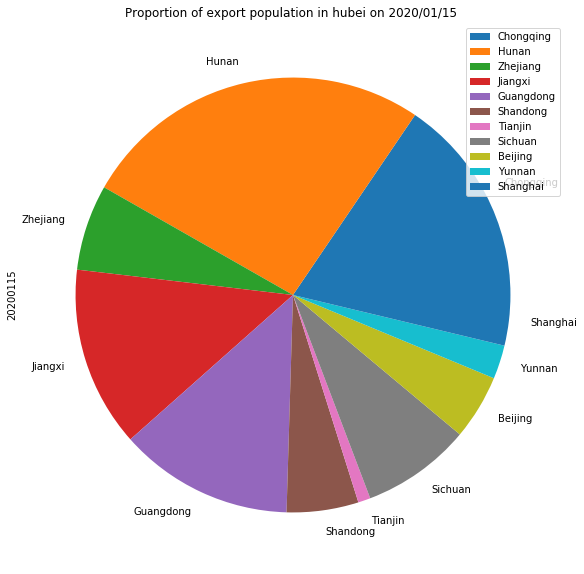

In [53]:
migrate_date23_before9.plot(
    kind='pie',
    x= 'province_name',
    y= '20200115',
    figsize=(20,10),
    title='Proportion of export population in hubei on 2020/01/15 '
);plt.show()

Pie chart1 shows the proportion of export population in Hubei province on 01/15/2020. From the pie chart it is clear that the majority of exported population from Hubei flows to Hunan, Shanghai, Guangdong and Jiangxi province.

In [54]:
migrate

,20200124,20200125,20200126,20200127,20200128,20200129,20200130,20200131,20200201,20200202,...,20200211,20200212,20200213,20200214,20200215,20200216,20200217,20200218,20200219,20200220
province_name,,,,,,,,,,,,,,,,,,,,,
Chongqing,9.19,8.55,3.97,4.69,8.02,10.91,14.07,14.05,15.06,12.38,...,13.96,14.27,11.32,10.00,11.27,11.93,12.24,11.46,11.42,10.33
Hunan,17.39,16.41,10.80,9.31,14.35,18.84,23.14,23.57,26.46,22.61,...,28.10,27.79,24.90,19.94,25.66,26.37,25.76,25.39,24.60,24.52
Zhejiang,3.64,5.14,6.77,5.60,4.37,3.34,2.88,2.03,1.79,2.30,...,1.01,1.10,1.08,1.32,2.08,2.10,1.80,2.98,3.54,4.50
Jiangxi,7.12,5.64,3.44,2.72,3.57,5.03,5.73,5.51,5.27,5.22,...,4.99,5.14,4.53,3.98,5.00,5.00,5.32,5.09,5.17,5.51
Guangdong,10.67,18.53,35.29,38.41,31.00,24.05,16.35,14.49,10.76,10.98,...,10.03,11.31,11.82,13.42,17.51,16.28,13.53,17.77,19.24,19.92
Shandong,2.04,1.74,1.59,1.43,1.03,0.92,0.82,0.69,0.84,1.21,...,0.84,0.84,0.96,0.86,0.95,0.87,1.00,1.19,1.14,0.96
Tianjin,0.32,0.65,0.86,0.62,0.43,0.37,0.29,0.35,0.24,0.31,...,0.24,0.30,0.39,0.38,0.54,0.52,0.43,0.71,0.44,0.44
Sichuan,4.37,4.05,3.22,3.19,2.91,3.56,3.51,3.93,4.48,7.63,...,4.16,4.31,3.95,7.39,3.57,2.19,1.75,1.50,1.77,1.15
Beijing,1.86,2.85,3.14,2.65,2.15,1.61,1.12,1.07,0.96,1.22,...,1.18,1.11,1.16,1.11,1.35,1.05,0.91,0.81,0.88,0.83


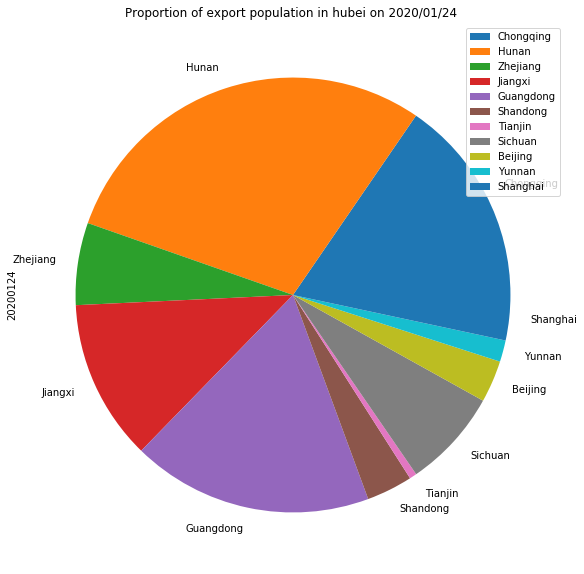

In [55]:
migrate_27days.plot(
    kind='pie',
    x= 'province_name',
    y= '20200124',
    figsize=(20,10),
    title='Proportion of export population in hubei on 2020/01/24 '
);plt.show()

Pie chart2 shows the proportion of export population in Hubei province on 01/23/2020. From the pie chart it is clear that the majority of exported population from Hubei flows to Hunan, Shanghai, Guangdong and Jiangxi province.

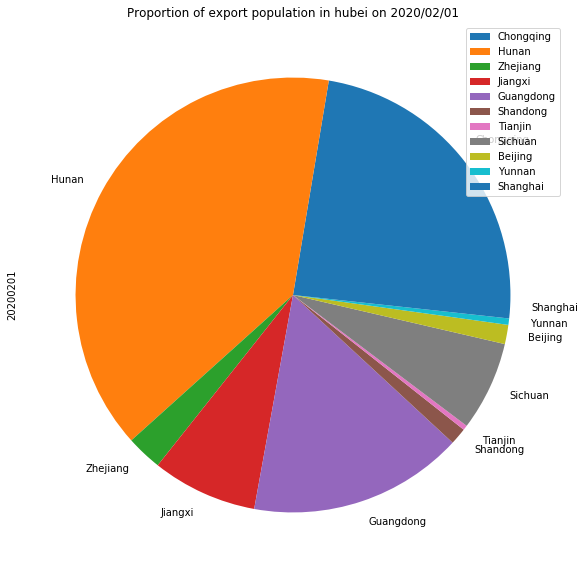

In [56]:
migrate.plot(
    kind='pie',
    x= 'province_name',
    y= '20200201',
    figsize=(20,10),
    title='Proportion of export population in hubei on 2020/02/01'
);plt.show()

Pie chart3 shows the proportion of export population in Hubei province on 01/31/2020. From the pie chart it is clear that the majority of exported population from Hubei flows to Hunan, Shanghai, Guangdong province.

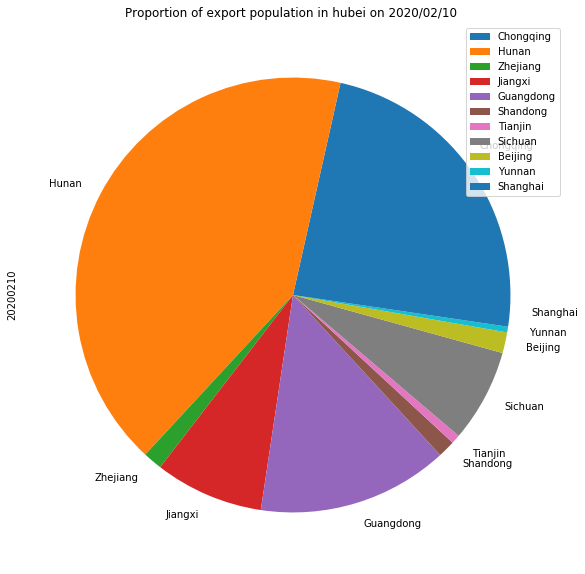

In [57]:
migrate.plot(
    kind='pie',
    x= 'province_name',
    y= '20200210',
    figsize=(20,10),
    title='Proportion of export population in hubei on 2020/02/10 '
);plt.show()

Pie chart4 shows the proportion of export population in Hubei province on 02/08/2020. From the pie chart it is clear that the majority of exported population from Hubei flows to Hunan, Shanghai, Guangdong province.

Province/State,Guangdong,Zhejiang,Hunan,Jiangxi,Chongqing,Shandong,Sichuan,Beijing,Shanghai,Yunnan,Tianjin,Taiwan,"Seattle, WA"
1/24/20,21.0,16.0,15.0,11.0,18.0,9.0,7.0,14.0,4.0,3.0,4.0,2.0,0.0
1/25/20,45.0,61.0,45.0,18.0,48.0,24.0,29.0,15.0,20.0,6.0,5.0,0.0,0.0
1/26/20,48.0,24.0,31.0,12.0,35.0,24.0,25.0,17.0,13.0,8.0,1.0,1.0,0.0
1/27/20,5.0,45.0,0.0,24.0,22.0,24.0,21.0,12.0,13.0,7.0,9.0,1.0,0.0
1/28/20,90.0,123.0,121.0,37.0,15.0,34.0,18.0,11.0,14.0,18.0,2.0,3.0,0.0
1/29/20,70.0,132.0,56.0,53.0,18.0,24.0,34.0,20.0,21.0,11.0,2.0,0.0,0.0
1/30/20,43.0,0.0,0.0,0.0,17.0,13.0,0.0,3.0,11.0,15.0,4.0,1.0,0.0
1/31/20,82.0,110.0,55.0,78.0,29.0,26.0,35.0,25.0,23.0,13.0,1.0,1.0,0.0
2/1/20,99.0,61.0,57.0,46.0,36.0,22.0,30.0,29.0,34.0,8.0,6.0,0.0,0.0
2/2/20,148.0,125.0,132.0,105.0,53.0,40.0,47.0,23.0,24.0,14.0,10.0,0.0,0.0


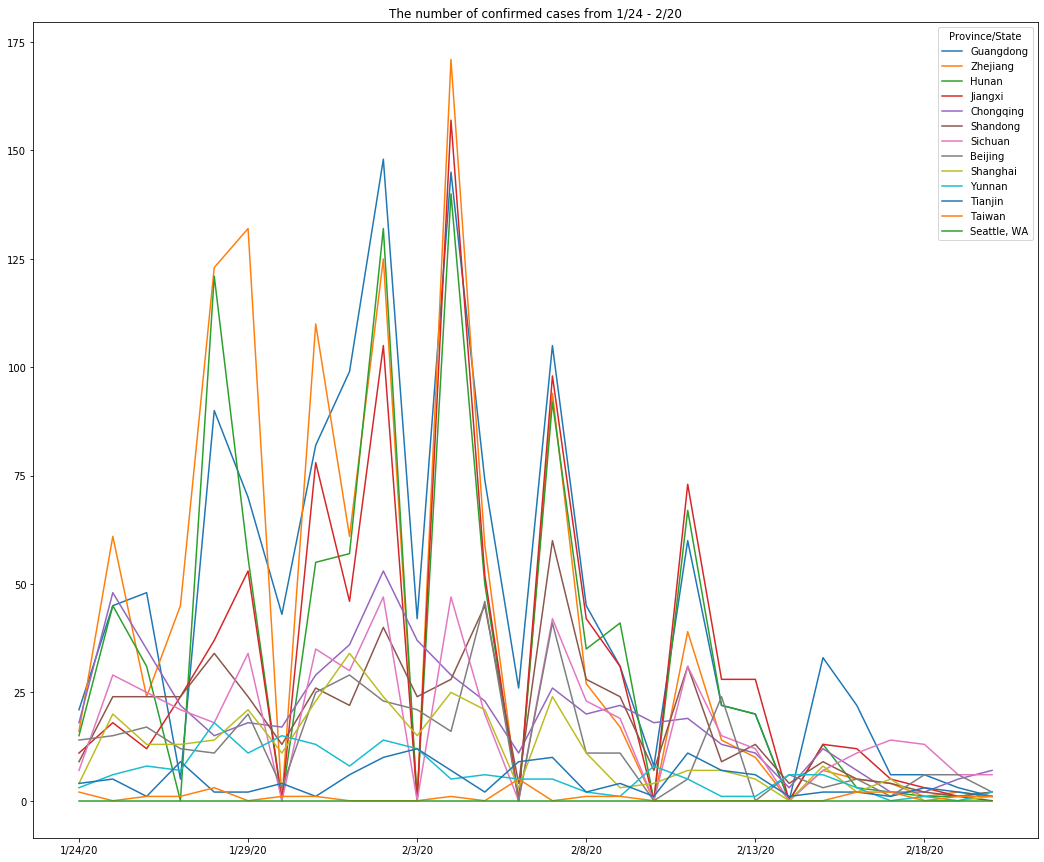

In [58]:
df_plot_con = pd.concat([df_confirm_first_14days, df_confirm_second_14days], axis=1, sort=False)
df_plot_con = df_plot_con.drop(['Hubei'])
df_plot_con = df_plot_con.T
df_plot_con.plot.line(figsize = (18,15), title = "The number of confirmed cases from 1/24 - 2/20")
df_plot_con

Line chart1 represents how the number of new coronavirus cases diagnosed daily in province/state changes from 01/24/2020 to 02/18/2020 in some provinces/states, including Guangdong, Zhejiang, Hunan, Jiangxi etc. This line chart shows the peak of new case confirmed daily around 02/05/2020. At peak, Guang, Zhejiang, Hunan and jiangxi provinces have more than 100 cases confirmed daily. The maximun new cases confirmed daily is 171 at 02/04/20 in Zhejiang province. Note that on some days we have daily confirmed cases to be zero, this is because some of the provinces did not report new confirmed cases daily.

# Descriptive Analysis

In [59]:
result

,province,date,confirmed,migrate
0,Chongqing,20200115,NaN,8.29
1,Chongqing,20200116,NaN,7.88
2,Chongqing,20200117,NaN,7.75
3,Chongqing,20200118,NaN,8.78
4,Chongqing,20200119,NaN,8.33
...,...,...,...,...
292,Shanghai,20200206,3.0,1.65
293,Shanghai,20200207,24.0,1.47
294,Shanghai,20200208,11.0,1.59
295,Shanghai,20200209,3.0,1.44


Our group final result contains 4 columns, including province: some provinces we studied are affected by coronavirus greatly; data: from 01/15/2020 to 02/10/2020; confirmed: new coronavirus confirmed daily; migrate: the propotion of population flow from Hubei province to the province we studied.

In [60]:
confirmed_mean=result['confirmed'].dropna().mean()
confirmed_median=result['confirmed'].dropna().median()
confirmed_std=result['confirmed'].dropna().std()
migrate_mean=result['migrate'].dropna().mean()
migrate_median=result['migrate'].dropna().median()
migrate_std=result['migrate'].dropna().std()
print('Average new confirmed cases daily in the provinces we studied: ', confirmed_mean)
print('Median of new confirmed cases daily in the provinces we studied: ', confirmed_median)
print('Standard deviation of new confirmed cases daily in the provinces we studied: ', confirmed_std)
print('Average proportion of population flow from Hubei province to the provinces we studied: ', migrate_mean)
print('Median of proportion of population flow from Hubei province to the provinces we studied: ', migrate_median)
print('Standard deviation of proportion of population flow from Hubei province to the provinces we studied: ', migrate_std)

Average new confirmed cases daily in the provinces we studied:  30.282828282828284
Median of new confirmed cases daily in the provinces we studied:  20.5
Standard deviation of new confirmed cases daily in the provinces we studied:  34.46650412619509
Average proportion of population flow from Hubei province to the provinces we studied:  5.633569023569024
Median of proportion of population flow from Hubei province to the provinces we studied:  2.77
Standard deviation of proportion of population flow from Hubei province to the provinces we studied:  7.0549722778093775


data_max - data_min =  171.0 - 0.0  =  171.0
IQR =  33.5


(7.25, 40.75)

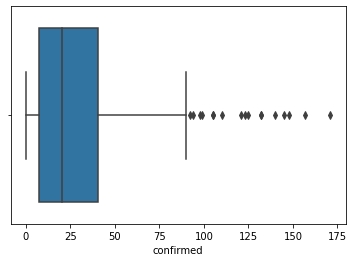

In [61]:
data_min = result['confirmed'].min()
data_max = result['confirmed'].max()
data_r =  data_max - data_min
print('data_max - data_min = ', data_max, '-' , data_min,' = ',  data_r)

# determine the 25th and 75th percentiles
sns.boxplot(x='confirmed',data=result)
lower,upper = np.percentile(result['confirmed'].dropna(), [25, 75])

# calculate IQR
iqr = upper - lower
print('IQR = ',iqr)

lower, upper

Boxplot1 displays the distribution of new cases confirmed daily in the provinces we studied. The maximun value is 171 and the minimun value is 0, thus the range is 171. And the first quartile (Q1) is 7.25, median is 20.5, the third quartile (Q3) is 40.75 and IQR is 33.5. Since the standard deviation is 34.47 (very large), there exist  many outliers. 

data_max - data_min =  38.41 - 0.14  =  38.269999999999996
IQR =  6.75


(1.08, 7.83)

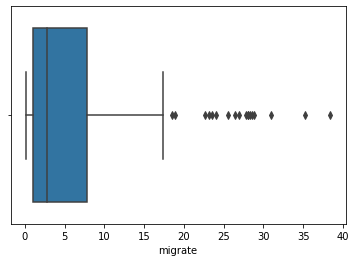

In [62]:

data_min = result['migrate'].min()
data_max = result['migrate'].max()
data_r_2 =  data_max - data_min
print('data_max - data_min = ', data_max, '-' , data_min,' = ',  data_r_2)

# determine the 25th and 75th percentiles
sns.boxplot(x='migrate',data=result)
lower,upper = np.percentile(result['migrate'].dropna(), [25, 75])

# calculate IQR
iqr = upper - lower
print('IQR = ',iqr)

lower, upper

Boxplot2 displays the distribution of proportion of population flow from Hubel province to the provinces we studied. The maximun value is 38.41 and the minimun value is 0.14, thus the range is 38.27. And the first quartile (Q1) is 1.095, median is 2.795, the third quartile (Q3) is 7.843 and IQR is 6.748. Since the standard deviation is 7.062 (very large), there exist many outliers. 

# Regression Analysis

#### Biological reasoning and assumption check

On March 10, the Peking University in collaboration with the National Institude of Health published a paper on medRxiv indicating that "The estimated median of incubation period is 8.13 days (95% confidence interval [CI]: 7·37-8·91), the mean is 8.62 days (95% CI: 8·02-9·28)". This is the most up to date analysis on the incubation period of COVID-19. This finding shows evidence for us to relate population flow from Hubei province to other provinces to the confirmed cases in the other provinces 9 days later. Finding a relationship between the two data provide essential information on the impact of traveling originated from Hubei province on the spread of COVID-19 and whether the travel bans declared by the Chinese govorment is effective or not. You can read this paper [here](https://www.medrxiv.org/content/10.1101/2020.03.06.20032417v1.full.pdf)

In order to take into account the confirmed cases in the other provinces 9 days later, we need to create a new column for each observation called confirmed_9_days_later. We will also only take the first 18 days of our 27 days data, since only the first 18 days have the corresponding confirmed_9_days_later values.

In [63]:
column_names = ["province", "date", "confirmed", "migrate", "confirmed_9_days_later"]
result_for_regression = pd.DataFrame(columns = column_names)

# Add a new column to each observation called confirmed_9_days_later
for index in range(0,297,27):
    result_to_append = result[index:index+27].copy()
    result_to_append["confirmed_9_days_later"] = result[index:index+27]["confirmed"].shift(-9).copy()
    result_for_regression = result_for_regression.append(result_to_append)

result_for_regression = result_for_regression.drop(['confirmed'], axis=1)
result_for_regression = result_for_regression.dropna(subset=['confirmed_9_days_later'])
result_for_regression

,province,date,migrate,confirmed_9_days_later
0,Chongqing,20200115,8.29,18.0
1,Chongqing,20200116,7.88,48.0
2,Chongqing,20200117,7.75,35.0
3,Chongqing,20200118,8.78,22.0
4,Chongqing,20200119,8.33,15.0
...,...,...,...,...
283,Shanghai,20200128,2.30,3.0
284,Shanghai,20200129,1.83,24.0
285,Shanghai,20200130,1.40,11.0
286,Shanghai,20200131,1.19,3.0


Since we have the migrate rate and confirmed_9_days_later data now, it is important for us to first talk about if our datasets meet the assumptions of Linear Regression: Linear relationship, Multivariate normality, No multicollinearity, No auto-correlation, Homoscedasticity. For the strict requirements of linear regression, we need to prove the two datasets have linear relationship, which is definitely not the case in reality. There are 26 provinces in China and people travel all the time, Hubei province only contribute to part of the population flow. Normally, the population flow from other provinces to a destination province should also be considered variables, but a very important assumption here greatly increases the importance of Hubei province: the coronavirus originated from and only from Wuhan city in Hubei province, meaning that we can assume the population flow from other provinces has zero contribution to the numbers of confirmed COVID-19 cases. With this particular reason, we argue that in the early period of the spreading of this virus, there is a linear relationship between the population flow from Hubei province to other provinces and the confirmed cases in those other provinces.

#### Linear regression analysis

In [64]:
outcome_1, predictors_1 = patsy.dmatrices("confirmed_9_days_later ~ migrate", result_for_regression)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                              OLS Regression Results                              
Dep. Variable:     confirmed_9_days_later   R-squared:                       0.129
Model:                                OLS   Adj. R-squared:                  0.125
Method:                     Least Squares   F-statistic:                     29.04
Date:                    Thu, 19 Mar 2020   Prob (F-statistic):           2.02e-07
Time:                            16:41:09   Log-Likelihood:                -967.69
No. Observations:                     198   AIC:                             1939.
Df Residuals:                         196   BIC:                             1946.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

As we can see above, the OLS regression reports a positive correlation between the population flow from Hubei province to other provinces and the confirmed cases 9 days later in those affected provinces.

To further show the difference between 1/15 to 1/23 (before Hubei province start to lockdown all major cities) and 1/24 to 2/10 (18 days after Hubei province start to lockdown all major cities), we can seperate our data regarding the two time period and make two seperate regression analysis to see if the influence of Hubei province changed between the time periods.

In [65]:
result_first_9_days = result_for_regression.loc[(result_for_regression['date'] == "20200115") | (result_for_regression['date'] == "20200116") | (result_for_regression['date'] == "20200117") | (result_for_regression['date'] == "20200118") | (result_for_regression['date'] == "20200119") | (result_for_regression['date'] == "20200120") | (result_for_regression['date'] == "20200121") | (result_for_regression['date'] == "20200122") | (result_for_regression['date'] == "20200123")]
result_second_9_days = result_for_regression.loc[(result_for_regression['date'] == "20200124") | (result_for_regression['date'] == "20200125") | (result_for_regression['date'] == "20200126") | (result_for_regression['date'] == "20200127") | (result_for_regression['date'] == "20200128") | (result_for_regression['date'] == "20200129") | (result_for_regression['date'] == "20200130") | (result_for_regression['date'] == "20200131") | (result_for_regression['date'] == "20200201")]

We first take a look at the relationship between migrate column and confirmed_9_days_later column for the first 9 days when the Chinese govorment did not issue a lockdown on Hubei province, therefore people were traveling as usual.

In [66]:
outcome_2, predictors_2 = patsy.dmatrices("confirmed_9_days_later ~ migrate", result_first_9_days)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()
print(res_2.summary())

                              OLS Regression Results                              
Dep. Variable:     confirmed_9_days_later   R-squared:                       0.108
Model:                                OLS   Adj. R-squared:                  0.099
Method:                     Least Squares   F-statistic:                     11.79
Date:                    Thu, 19 Mar 2020   Prob (F-statistic):           0.000878
Time:                            16:41:09   Log-Likelihood:                -465.03
No. Observations:                      99   AIC:                             934.1
Df Residuals:                          97   BIC:                             939.3
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

In [67]:
outcome_3, predictors_3 = patsy.dmatrices("confirmed_9_days_later ~ migrate", result_second_9_days)
mod_3 = sm.OLS(outcome_3, predictors_3)
res_3 = mod_3.fit()
print(res_3.summary())

                              OLS Regression Results                              
Dep. Variable:     confirmed_9_days_later   R-squared:                       0.135
Model:                                OLS   Adj. R-squared:                  0.127
Method:                     Least Squares   F-statistic:                     15.20
Date:                    Thu, 19 Mar 2020   Prob (F-statistic):           0.000178
Time:                            16:41:09   Log-Likelihood:                -497.40
No. Observations:                      99   AIC:                             998.8
Df Residuals:                          97   BIC:                             1004.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

#### Interpretation

For the time period from 1/15 to 2/1:
If the migration rate were 0, the confirmed cases 9 days later would be 19.9663. (The Intercept, $\beta_0$)
For every 1 unit increase in the migration rate, you expect to see a 1.9105 unit increase in the confirmed cases 9 days later. (The effect size, $\beta_1$)

For the time period from 1/15 to 1/23:
If the migration rate were 0, the confirmed cases 9 days later would be 18.7854. (The Intercept, $\beta_0$)
For every 1 unit increase in the migration rate, you expect to see a 2.0835 unit increase in the confirmed cases 9 days later. (The effect size, $\beta_1$)

For the time period from 1/24 to 2/1:
If the migration rate were 0, the confirmed cases 9 days later would be 20.7780. (The Intercept, $\beta_0$)
For every 1 unit increase in the migration rate, you expect to see a 1.8446 unit increase in the confirmed cases 9 days later. (The effect size, $\beta_1$)

All the linear regression analysis above passes their statistical tests, with a P>|t| value around 0.000 - 0.001.

The result above shows that the population flow from Hubei province to the other provinces in the first 9 days had more impact on the confirmed cases 9 days later for those provinces. Since the lockdown was initialed on 1/23, we can conclude that the lockdown policy had positive impact on stopping the virus from further spreading from Hubei provinces to the 11 provinces we studied.

# Ethics & Privacy

All our datasets are collected from public records online, including numbers of global coronavirus cases, transportation ban records and time stamps of how the disease developed. They are collected and distributed by authorities such as the Chinese government or the Centers for Disease Control. Since these data are all open to access, we have permission to use them in our analysis, no privacy concerns in our project. In our datasets, we ignore all details on ethnic identity, age, gender or any other unspecified aspects of patients who are confirmed to have the coronavirus. In this way, we minimize the potential biases introduced into our experiment. Our goal is to include all confirmed coronavirus cases to provide accurate quantitative analysis on the development of this ongoing epidemic.

For our population flow data, only percentage data is preserved, this is to avoid disclosing any personal travel data, as well as follow the policy of Baidu to avoid national security concerns.

Even though the quarantine might be proven effective, it might not be the best solution to prevent the spread of COVID-19. Other measures that are less impactful on citizens' everyday lives and the economy should continue to be discussed.

# Conclusion & Discussion

Our project aspired to determine if quarantines implemented on cities with COVID-19 outbreaks would curb the spread of this disease: if the quarantine was effective, a positive correlation between the population flow from Hubei to other regions and the confirmed cases 9 days later in those destinations should be observed.

Using the number of confirmed cases in each province/state and the percentage of population flow from Hubei to the corresponding province/state during January 23, 2020 (when Wuhan was quarantined) +/- 9 days, the positive correlation mentioned above was proven by the result of OLS linear regression analysis. Therefore, we conclude that quarantining regions affected by COVID-19 is an effective way to curb the COVID-19.

It should be noted that the results of this project should only be applied to COVID-19-specific cases due to the diverse spread patterns of different diseases. We also did not take some variables such as the medical resource availabilities into consideration.

# Team Contributions

Yiyang Yin is the leader of this project, he is responsible for the linear regression analysis as well as putting everything together.

Zanyuan Yang is responsible for the data cleaning.

Zihao Chen is responsible for visualization of the datasets.

Sijie Wang is responsible for the descriptive analysis.

Alex Guo is responsible for the Overview, Dataset description, Conclusion & Discussion for our final report.